In [1]:
# install
# https://discourse.jupyter.org/t/python-in-terminal-finds-module-jupyter-notebook-does-not/2262/7
# **!**pip install module name
# !pip install could install to wrong env use % instead
%pip install jupyter notebook
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install numpy
%pip install scipy
%pip install statsmodels
%pip install -U scikit-learn
%pip install ipykernel
# !pip install nb-black
%pip install nb-black



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    # plot_confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

<IPython.core.display.Javascript object>

In [4]:
who = pd.read_csv("who_data.csv")

<IPython.core.display.Javascript object>

In [5]:
# copying data to another variable to avoid any changes to original data
data = who.copy()

<IPython.core.display.Javascript object>

In [6]:
data.head()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,north_america,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,married,Exec-managerial,White,Male,0,0,13,north_america,<=50K
2,38,Private,215646,HS-grad,9,not_married,Handlers-cleaners,White,Male,0,0,40,north_america,<=50K
3,53,Private,234721,11th,7,married,Handlers-cleaners,Black,Male,0,0,40,north_america,<=50K
4,28,Private,338409,Bachelors,13,married,Prof-specialty,Black,Female,0,0,40,north_america,<=50K


<IPython.core.display.Javascript object>

In [7]:
data.tail()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,race,sex,capital_gain,capital_loss,working_hours_per_week,native_contienent,salary
32526,27,Private,257302,Assoc-acdm,12,married,Tech-support,White,Female,0,0,38,north_america,<=50K
32527,40,Private,154374,HS-grad,9,married,Machine-op-inspct,White,Male,0,0,40,north_america,>50K
32528,58,Private,151910,HS-grad,9,not_married,Adm-clerical,White,Female,0,0,40,north_america,<=50K
32529,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,north_america,<=50K
32530,52,Self-emp-inc,287927,HS-grad,9,married,Exec-managerial,White,Female,15024,0,40,north_america,>50K


<IPython.core.display.Javascript object>

-  The dataset contains information about different types of people.

### Understand the shape of the dataset.

In [8]:
data.shape

(32531, 14)

<IPython.core.display.Javascript object>

* The dataset has 32531 rows and 14 columns 

### Check the data types of the columns for the dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32531 entries, 0 to 32530
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32531 non-null  int64 
 1   workclass               32531 non-null  object
 2   fnlwgt                  32531 non-null  int64 
 3   education               32531 non-null  object
 4   education_no_of_years   32531 non-null  int64 
 5   marital_status          32531 non-null  object
 6   occupation              32531 non-null  object
 7   race                    32531 non-null  object
 8   sex                     32531 non-null  object
 9   capital_gain            32531 non-null  int64 
 10  capital_loss            32531 non-null  int64 
 11  working_hours_per_week  32531 non-null  int64 
 12  native_contienent       32531 non-null  object
 13  salary                  32531 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


<IPython.core.display.Javascript object>

In [10]:
def is_categorical(array_like):
    return array_like.dtype.name == 'category'

col_dtypes={}

for i in range(4):
    if i == 0:
        for number,col in enumerate(data):
            print(data[col].dtype.name) # https://stackoverflow.com/questions/26924904/check-if-dataframe-column-is-categorical
            # print(is_categorical(data[col])) # https://stackoverflow.com/questions/26924904/check-if-dataframe-column-is-categorical
    i+=1
    if i==1:
        print('-'*10)
        print('int64 cols:')
        print('-'*10)
    i+=1
    if i==2:
        for number,col in enumerate(data):
            if (data[col].dtype.name == "int64"):
                print(col)
    i+=1
    if i==3:
        print('-'*10)
        print('dtypes:')
        print('-'*10)

        for number, col in enumerate(data):
            dtype_holder=data[col].dtype.name
            print('str(dtype_holder)')
            print(str(dtype_holder))
            s_dtype_holder=str(dtype_holder)
            # dtype_holder.str # should be str(dtype_holder)
            val_redo=(s_dtype_holder) # data[col].dtype.name is int64 or object depending on dtype of column
            # value=col_dtypes[number].value # delete

            key_redo=(str(col))
            # key=col_dtypes[number].key
            pair=key_redo + ':' + val_redo
            pair_to_str=str(pair)
            print(pair_to_str)
            col_dtypes.update({key_redo : val_redo}) # https://stackoverflow.com/questions/31069955/update-dictionary-items-with-a-for-loop
            # col_dtypes.update(key_redo,val_redo) # alternative
        print(col_dtypes)

int64
object
int64
object
int64
object
object
object
object
int64
int64
int64
object
object
----------
int64 cols:
----------
age
fnlwgt
education_no_of_years
capital_gain
capital_loss
working_hours_per_week
----------
dtypes:
----------
str(dtype_holder)
int64
age:int64
str(dtype_holder)
object
workclass:object
str(dtype_holder)
int64
fnlwgt:int64
str(dtype_holder)
object
education:object
str(dtype_holder)
int64
education_no_of_years:int64
str(dtype_holder)
object
marital_status:object
str(dtype_holder)
object
occupation:object
str(dtype_holder)
object
race:object
str(dtype_holder)
object
sex:object
str(dtype_holder)
int64
capital_gain:int64
str(dtype_holder)
int64
capital_loss:int64
str(dtype_holder)
int64
working_hours_per_week:int64
str(dtype_holder)
object
native_contienent:object
str(dtype_holder)
object
salary:object
{'age': 'int64', 'workclass': 'object', 'fnlwgt': 'int64', 'education': 'object', 'education_no_of_years': 'int64', 'marital_status': 'object', 'occupation': 'objec

<IPython.core.display.Javascript object>

In [11]:
pd.set_option('display.max_rows', 500) # https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


for number,col in enumerate(data):
    if (data[col].dtype.name == "object"):
        print(col, data[col].unique(), data[col].dtype.name) # https://stackoverflow.com/questions/26924904/check-if-dataframe-column-is-categorical
        # print(is_categorical(data[col])) # https://stackoverflow.com/questions/26924904/check-if-dataframe-column-is-categorical

workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Unknown' 'Self-emp-inc' 'Without-pay' 'Never-worked'] object
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] object
marital_status ['Never-married' 'married' 'not_married'] object
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Unknown'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] object
race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] object
sex ['Male' 'Female'] object
native_contienent ['north_america' 'asia' 'other' 'europe' 'south_america'] object
salary [' <=50K' ' >50K'] object


<IPython.core.display.Javascript object>

In [12]:
len("workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'")


77

<IPython.core.display.Javascript object>

all cols
* age: continuous - age of a Person 
* workclass: Where works - categorical - (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked, Unknown)
* fnlwgt: continuous - Weight - similar demographic similar weights as similar weights to similar demographic characteristics.
* education: Degree - categorical - (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)
* education-num: no. years studied - continuous.
* marital-status: categorical - (Married, Never-married, Not-married)
* occupation: categorical - (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces, Unknown)
* race: categorical - (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
* sex: categorical - (Female, Male)
* capital-gain: Investment gain of the person other than salary - continuous
* capital-loss: Loss from investments - continuous
* hours-per-week: No. hours works - continuous.
* native-contienent: categorical - (North America, Asia, Other, Europe, South America)
* salary: >50K, <=50K (dependent variable, the salary is in Dollars per year) 

just the object / categorical columns:
* workclass: Where works - categorical - (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked, Unknown)
* education: Degree - categorical - (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)
* marital-status: categorical - (Married, Never-married, Not-married)
* occupation: categorical - (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces, Unknown)
* race: categorical - (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
* sex: categorical - (Female, Male)
* native-contienent: categorical - (North America, Asia, Other, Europe, South America)
* salary: >50K, <=50K (dependent variable, the salary is in Dollars per year) 

Why is the salary categorical type?
Why is salary the dependent variable? As this is the result of all the input factors. i.e. salary is the output

just the numerical datatype columns
* age: continuous - age of a Person 
* fnlwgt: continuous - Weight - similar demographic similar weights as similar weights to similar demographic characteristics.
* education-num: no. years studied - continuous.
* capital-gain: Investment gain of the person other than salary - continuous
* capital-loss: Loss from investments - continuous
* hours-per-week: No. hours works - continuous.
* salary: >50K, <=50K (dependent variable, the salary is in Dollars per year) 

just the dependent variable
* salary: >50K, <=50K (dependent variable, the salary is in Dollars per year) 

* Dependent variable is the salary which is of categorical type.<br><br>
* age, 
* fnlwgt, 
* education_no_of_years, 
* capital gain, 
* capital loss and 
* working_hours_per_week <br><br>
* are of integer type while other variables are of categorical type. <br><br>
* There are <b><u>no missing values</u></b> in the dataset.

In [13]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [14]:
data.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_contienent         0
salary                    0
dtype: int64

<IPython.core.display.Javascript object>

- There are no missing values in the dataset

### Statistical summary

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32531.0,38.588362,13.637644,17.0,28.0,37.0,48.0,90.0
fnlwgt,32531.0,189788.230826,105564.168325,12285.0,117815.0,178370.0,237019.0,1484705.0
education_no_of_years,32531.0,10.081953,2.571842,1.0,9.0,10.0,12.0,16.0
capital_gain,32531.0,1078.642649,7388.624210,0.0,0.0,0.0,0.0,99999.0
capital_loss,32531.0,87.384341,403.137260,0.0,0.0,0.0,0.0,4356.0
working_hours_per_week,32531.0,40.441025,12.347506,1.0,40.0,40.0,45.0,99.0


<IPython.core.display.Javascript object>

* `age`: Average age of people in the dataset is around 38 years, age has a wide range from 17 to 90 years.
* `education_no_of_years`: The average number of years spent in education is ~10 years. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.
* `capital_gain`: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.
* `capital_loss`: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `working_hours_per_week`: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**The below functions need to be defined to carry out the EDA.**

In [16]:
def histogram_boxplot(data, feature, figsize=(8, 5), kde=False, bins=None):    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # Figs 1 to 4:
    # Fig 1 of 4 (1 axis):
    # using the variable ax for single a Axes
    # figsize=(2,1)
    # fig, ax = plt.subplots(figsize=figsize)
    # fig.patch.set_facecolor('xkcd:mint green')
    # ax.set_facecolor('xkcd:marine blue')
    # # xkcd colors:
    # # https://xkcd.com/color/rgb/

    # # Fig 2 of 4 (4 axes):
    # figsize=(5,4)
    # # using the variable axs for multiple Axes
    # fig, axs = plt.subplots(2, 2, figsize=figsize)
    # axs[0, 0].set_facecolor((205/255, 203/255, 64/255)) # rgb(205, 203, 64) # fig 2 of 4 axs[0, 0] = top left = row 0 col 0
    # axs[0, 1].set_facecolor((64/255, 205/255, 203/255)) # rgb(64, 205, 203) # fig 2 of 4 axs[0, 1] = top right = row 0 col 1
    # axs[1, 0].set_facecolor((255/255, 179/255, 0/255)) # rgb(255, 179, 0)) # fig 2 of 4 axs[1, 0] = bottom left = row 1 col 0
    # axs[1, 1].set_facecolor((0/255, 179/255, 255/255)) # rgb(0, 179, 255)) # fig 2 of 4 axs[1, 1] = bottom right = row 1 col 1
    # fig.patch.set_facecolor('xkcd:marine blue') # fig 2 of 4: frame

    # # Fig 3 of 4 (2 axes):
    # figsize=(3,1)
    # # using tuple unpacking for multiple Axes
    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    # ax1.set_facecolor((205/255, 203/255, 64/255)) # rgb(205, 203, 64) # fig 3 of 4 ax1 = left
    # ax2.set_facecolor('orange') # fig 3 of 4 ax2 = right
    # fig.patch.set_facecolor('xkcd:bright purple')  # fig 3 of 4

    # # Fig 4 of 4 (4 axes):
    # figsize=(4,3)
    # fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
    # ax1.set_facecolor((205/255, 203/255, 64/255)) # rgb(205, 203, 64)
    # ax2.set_facecolor('green') # fig 4 ax2 top right
    # ax3.set_facecolor((205/255, 203/255, 64/255)) # rgb(205, 203, 64)
    # ax4.set_facecolor('blue') # fig 4 subplot bottom right = ax4 = axis4
    # fig.patch.set_facecolor('xkcd:cerulean blue')


    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    
    # first: formatting:
    ax_box2.set_facecolor((205/255, 203/255, 64/255)) # rgb(205, 203, 64)
    ax_hist2.set_facecolor('green') # fig 4 ax2 top right
    f2.patch.set_facecolor('xkcd:cerulean blue')

    
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.set_facecolor('lightblue')

<IPython.core.display.Javascript object>

### post histogram_boxplot

In [106]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6), facecolor='blue')
    else:
        plt.figure(figsize=(n + 2, 6), facecolor='blue')

    plt.xticks(rotation=90, fontsize=15)

    # # declare figsize:
    # figsize=(8, 5)
    # # subplots:
    # f2, ax2 = plt.subplots(
    # nrows=2,  # Number of rows of the subplot grid= 2
    # sharex=True,  # x-axis will be shared among all subplots
    # gridspec_kw={"height_ratios": (0.25, 0.75)},
    # figsize=figsize
    # )  # creating the 2 subplots

    # https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib
    # fig, ax1 = plt.subplots(nrows=1)
    # ax1.plot(range(10), 'r-')
    
    plt.figure(facecolor='blue')

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    # but first: formatting:
    ax.set_facecolor((205/255, 203/255, 64/255)) # rgb(205, 203, 64)
    ax.patch.set_facecolor('xkcd:cerulean blue')
    # f2.patch.set_facecolor('xkcd:cerulean blue')

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [18]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [19]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [20]:
df = data.copy()

<IPython.core.display.Javascript object>

### post post histogram_boxplot. iteration 1

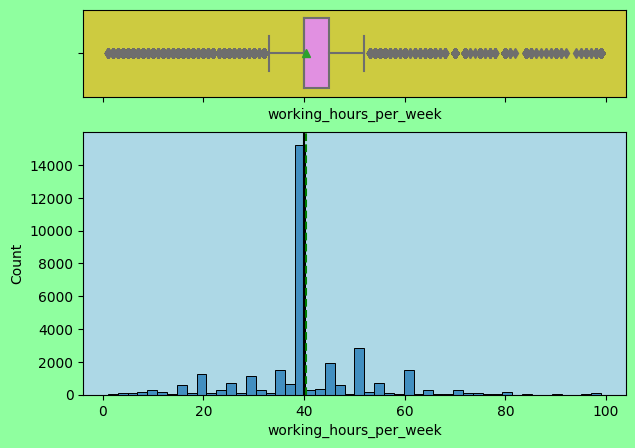

<IPython.core.display.Javascript object>

In [21]:
# from call
# df, "working_hours_per_week", bins=50)
# declare vars from distogram_function args
data=df
feature="working_hours_per_week"
figsize=(7, 5)
kde=False
# bins=None
bins=50
# from histogram_function
f2, (ax_box2, ax_hist2) = plt.subplots(
    nrows=2,  # Number of rows of the subplot grid= 2
    sharex=True,  # x-axis will be shared among all subplots
    gridspec_kw={"height_ratios": (0.25, 0.75)},
    figsize=figsize,
)  # creating the 2 subplots
sns.boxplot(
    data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
)  # boxplot will be created and a triangle will indicate the mean value of the column
sns.histplot(
    data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
) if bins else sns.histplot(
    data=data, x=feature, kde=kde, ax=ax_hist2
)  # For histogram
ax_hist2.axvline(
    data[feature].mean(), color="green", linestyle="--"
)  # Add mean to the histogram
ax_hist2.axvline(
    data[feature].median(), color="black", linestyle="-"
)  # Add median to the histogram

# pick rbg color using a stylesheet, divide by 255 to scale to [0, 1]
ax_box2.set_facecolor((205/255, 203/255, 64/255)) # rgb(205, 203, 64)
# References to follow:

# how to scale rbg 0,1:
# https://stackoverflow.com/questions/10848990/rgb-values-to-0-to-1-scale

# idea from matplotlib docs of feasibility of using rgb values to specify color:
# https://matplotlib.org/3.1.1/gallery/color/color_demo.html

# idea on specifying rgb using tuple:
# https://stackoverflow.com/questions/45363146/how-to-pass-rgb-color-values-to-pythons-matplotlib-eventplot

# matplotlib docs > Specifying Colors:
# https://matplotlib.org/3.1.1/tutorials/colors/colors.html

# search string:
# set_facecolor( rgb )
# https://www.google.com/search?q=set_facecolor%28+rgb+%29&newwindow=1&sxsrf=AJOqlzUjmZmIo4k8FmAMLNd1tdKjtrbb-Q%3A1675898894255&ei=DjDkY4ScD9SVgQa_o62YCQ&ved=0ahUKEwiE25XyiYf9AhXUSsAKHb9RC5MQ4dUDCBA&uact=5&oq=set_facecolor%28+rgb+%29&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIJCAAQFhAeEPEEMgYIABAWEB4yBQgAEIYDMgUIABCGAzIFCAAQhgMyBQgAEIYDOgoIABBHENYEELADOgkIABAHEB4Q8QQ6BwgAEB4Q8QRKBAhBGABKBAhGGABQnQtY1CFgqSNoAnABeACAAVOIAeoBkgEBM5gBAKABAcgBCMABAQ&sclient=gws-wiz-serp

# idea on how to change color of axis / frame:
# https://stackoverflow.com/questions/1982770/matplotlib-changing-the-color-of-an-axis

# How to change plot background color?
# https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color

# search string:
# matplotlib subplots frame color
# https://www.google.com/search?q=matplotlib+subplots+frame+color&newwindow=1&sxsrf=AJOqlzWsUktzioiJHLh3MCw7QVZQKIoEYQ:1675897845566&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjL647-hYf9AhU3RkEAHVlcAzsQ_AUoAXoECAIQAw&biw=1097&bih=575&dpr=1.75#imgrc=7ljMcfC2jeledM

# matplotlib Docs > matplotlib.axes
# https://matplotlib.org/stable/api/axes_api.html

# axarr[1,0].set_facecolor('grey')
# https://stackoverflow.com/questions/23313586/set-background-color-for-subplot

# search string:
# change plt.subplots background color
# https://www.google.com/search?q=change+plt.subplots+background+color&oq=change+plt.subplots+background+color&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTILCAEQABgWGB4Y8QQyBwgCEAAYhgMyBwgDEAAYhgMyBwgEEAAYhgMyBwgFEAAYhgMyBwgGEAAYhgPSAQg3NTI0ajBqN6gCALACAA&sourceid=chrome&ie=UTF-8

# How to change axes background color in Matplotlib?
# https://www.tutorialspoint.com/how-to-change-axes-background-color-in-matplotlib

# search string:
# how change matplotlib plot background color
# https://www.google.com/search?q=how+change+matplotlib+plot+background+color&oq=how+change+matplotlib+plot+background+color&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIGCAEQRRhA0gEJMTIzNTVqMGo3qAIAsAIA&sourceid=chrome&ie=UTF-8

ax_hist2.set_facecolor('lightblue')
# plt.rc('axes',edgecolor='black')
# https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib

f2.patch.set_facecolor('xkcd:mint green')
# https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color

### iteration2

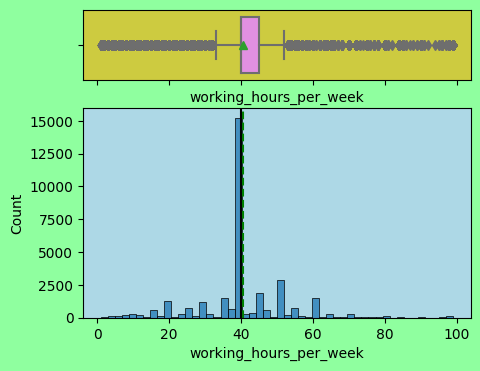

<IPython.core.display.Javascript object>

In [22]:
# from call
# df, "working_hours_per_week", bins=50)
# declare vars from distogram_function args
data=df
feature="working_hours_per_week"
figsize=(5, 4)
kde=False
# bins=None
bins=50
# from histogram_function
f2, (ax_box2, ax_hist2) = plt.subplots(
    nrows=2,  # Number of rows of the subplot grid= 2
    sharex=True,  # x-axis will be shared among all subplots
    gridspec_kw={"height_ratios": (0.25, 0.75)},
    figsize=figsize,
)  # creating the 2 subplots
sns.boxplot(
    data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
)  # boxplot will be created and a triangle will indicate the mean value of the column
sns.histplot(
    data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
) if bins else sns.histplot(
    data=data, x=feature, kde=kde, ax=ax_hist2
)  # For histogram
ax_hist2.axvline(
    data[feature].mean(), color="green", linestyle="--"
)  # Add mean to the histogram
ax_hist2.axvline(
    data[feature].median(), color="black", linestyle="-"
)  # Add median to the histogram

# pick rbg color using a stylesheet, divide by 255 to scale to [0, 1]
ax_box2.set_facecolor((205/255, 203/255, 64/255)) # rgb(205, 203, 64)
ax_hist2.set_facecolor('lightblue')
# plt.rc('axes',edgecolor='black')
# https://stackoverflow.com/questions/7778954/elegantly-changing-the-color-of-a-plot-frame-in-matplotlib
f2.patch.set_facecolor('xkcd:mint green')
# https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color

### post iter 2

In [23]:
print(f2)

Figure(500x400)


<IPython.core.display.Javascript object>

In [24]:
f2.savefig('file.png')

<IPython.core.display.Javascript object>

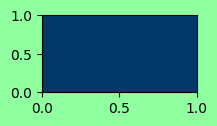

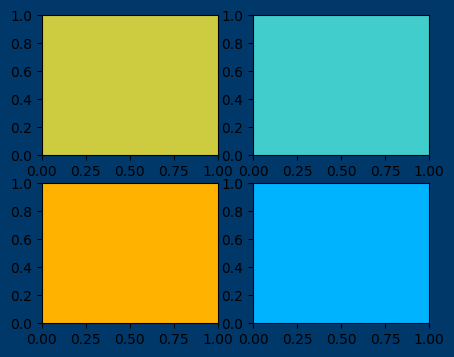

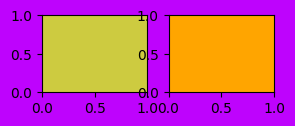

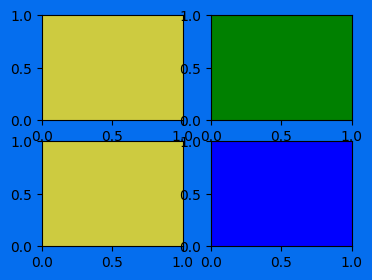

<IPython.core.display.Javascript object>

In [25]:
# Fig 1 of 4 (1 axis):
# using the variable ax for single a Axes
figsize=(2,1)
fig, ax = plt.subplots(figsize=figsize)
fig.patch.set_facecolor('xkcd:mint green')
ax.set_facecolor('xkcd:marine blue')
# xkcd colors:
# https://xkcd.com/color/rgb/

# Fig 2 of 4 (4 axes):
figsize=(5,4)
# using the variable axs for multiple Axes
fig, axs = plt.subplots(2, 2, figsize=figsize)
axs[0, 0].set_facecolor((205/255, 203/255, 64/255)) # rgb(205, 203, 64) # fig 2 of 4 axs[0, 0] = top left = row 0 col 0
axs[0, 1].set_facecolor((64/255, 205/255, 203/255)) # rgb(64, 205, 203) # fig 2 of 4 axs[0, 1] = top right = row 0 col 1
axs[1, 0].set_facecolor((255/255, 179/255, 0/255)) # rgb(255, 179, 0)) # fig 2 of 4 axs[1, 0] = bottom left = row 1 col 0
axs[1, 1].set_facecolor((0/255, 179/255, 255/255)) # rgb(0, 179, 255)) # fig 2 of 4 axs[1, 1] = bottom right = row 1 col 1
fig.patch.set_facecolor('xkcd:marine blue') # fig 2 of 4: frame

# Fig 3 of 4 (2 axes):
figsize=(3,1)
# using tuple unpacking for multiple Axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
ax1.set_facecolor((205/255, 203/255, 64/255)) # rgb(205, 203, 64) # fig 3 of 4 ax1 = left
ax2.set_facecolor('orange') # fig 3 of 4 ax2 = right
fig.patch.set_facecolor('xkcd:bright purple')  # fig 3 of 4

# Fig 4 of 4 (4 axes):
figsize=(4,3)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
ax1.set_facecolor((205/255, 203/255, 64/255)) # rgb(205, 203, 64)
ax2.set_facecolor('green') # fig 4 ax2 top right
ax3.set_facecolor((205/255, 203/255, 64/255)) # rgb(205, 203, 64)
ax4.set_facecolor('blue') # fig 4 subplot bottom right = ax4 = axis4
fig.patch.set_facecolor('xkcd:cerulean blue')

In [26]:
plt.show()

<IPython.core.display.Javascript object>

##### Univariate Analysis

###### Observations on hours_per_week

### histogram_boxplot function call

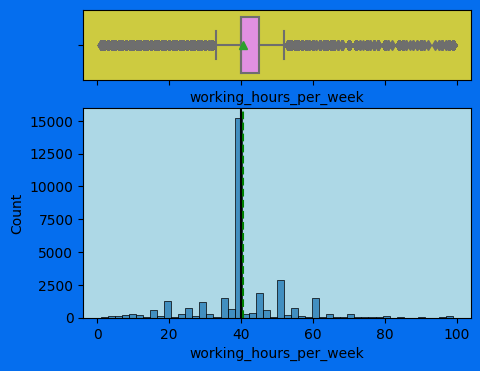

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(df, "working_hours_per_week", (5,4), kde, bins=50)

# figsize=(4,3)
#  figsize=figsize)
# ax1.set_facecolor((205/255, 203/255, 64/255)) # rgb(205, 203, 64)
# ax2.set_facecolor('green') # fig 4 ax2 top right
# ax3.set_facecolor((205/255, 203/255, 64/255)) # rgb(205, 203, 64)
# ax4.set_facecolor('blue') # fig 4 subplot bottom right = ax4 = axis4
# fig.patch.set_facecolor('xkcd:cerulean blue')

* Most of the data is concentrated around 40 working hours this gives a sense that most of the observations in data might be salaried employees working 8hrs 5 days a week.
* Some of the observations are clear outliers which needs to be treated.

#### Observations on workclass

facecolor sets frame color

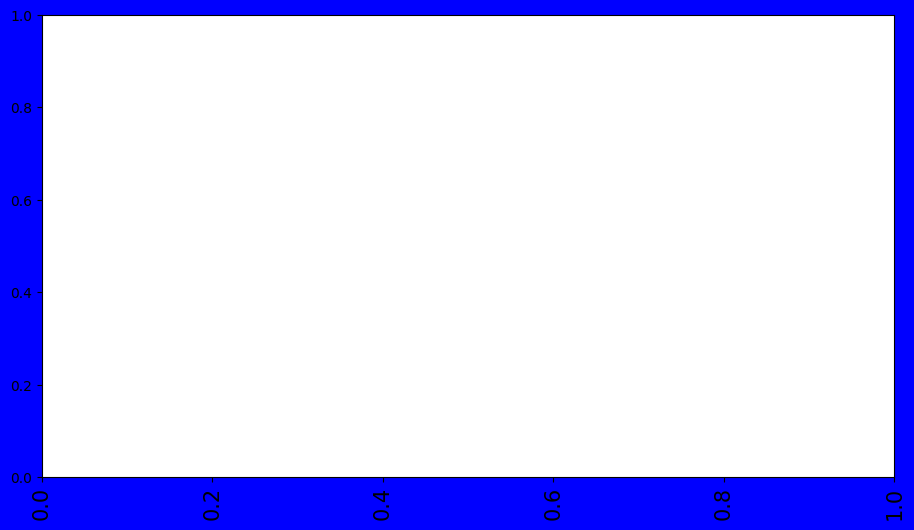

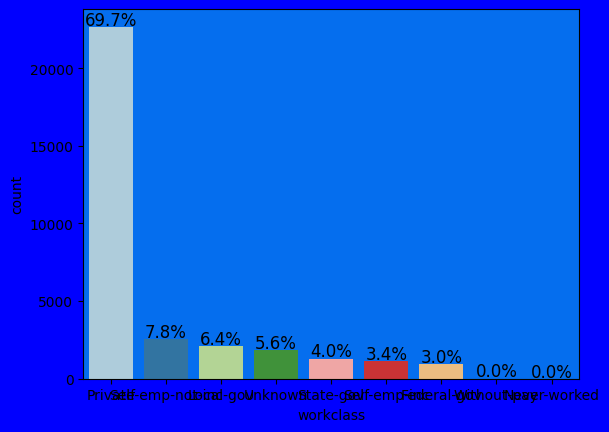

<IPython.core.display.Javascript object>

In [107]:
labeled_barplot(df, "workclass", perc=True)

* ~70% of the observations are from the Private sector working class.
* As expected from the number of hours per week.

#### Observations on native_country

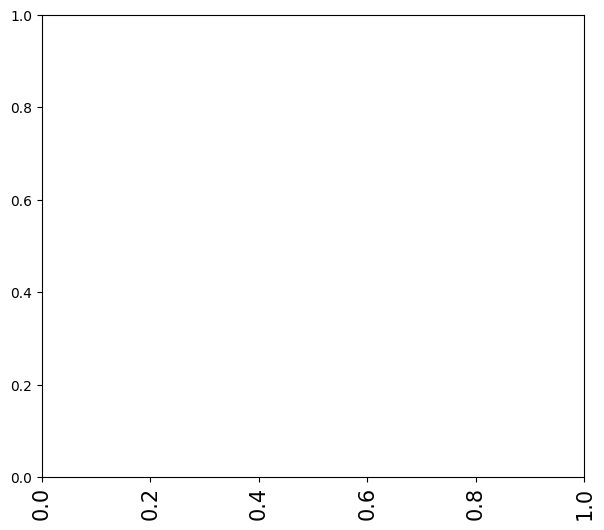

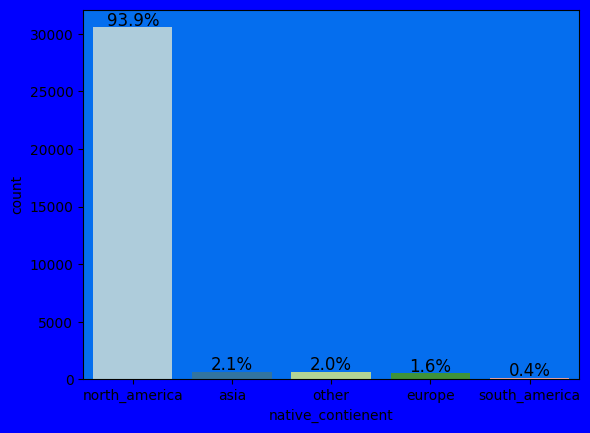

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df, "native_contienent", perc=True)

* ~94% of the people are native to north_america followed by 2.1% Asians.

#### Observations on salary

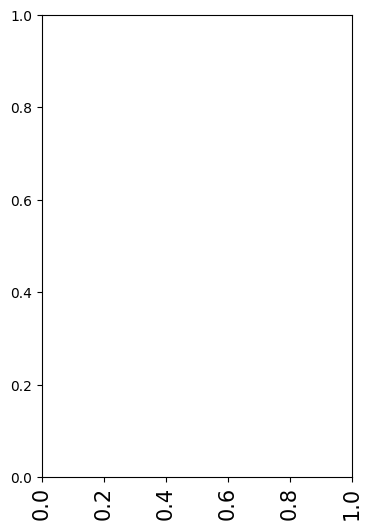

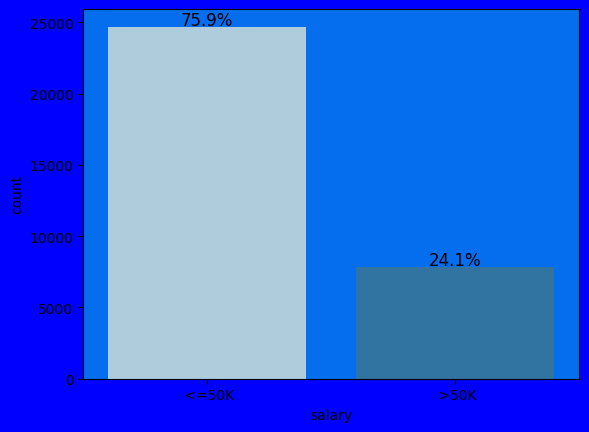

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(df, "salary", perc=True)

* ~24% of the observations have a salary above 50K and while ~76% have a salary below 50K

### Bivariate analysis

#### Correlation check

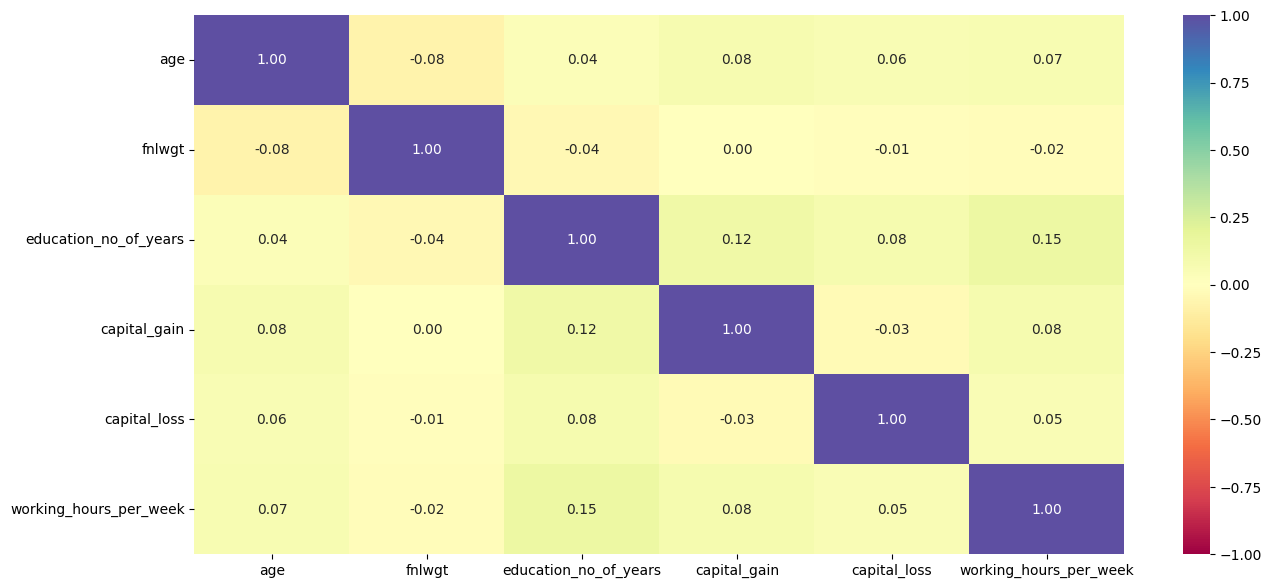

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no significant correlation between the columns.

#### salary vs sex

salary   <=50K   >50K    All
sex                         
All      24692   7839  32531
Male     15113   6660  21773
Female    9579   1179  10758
------------------------------------------------------------------------------------------------------------------------


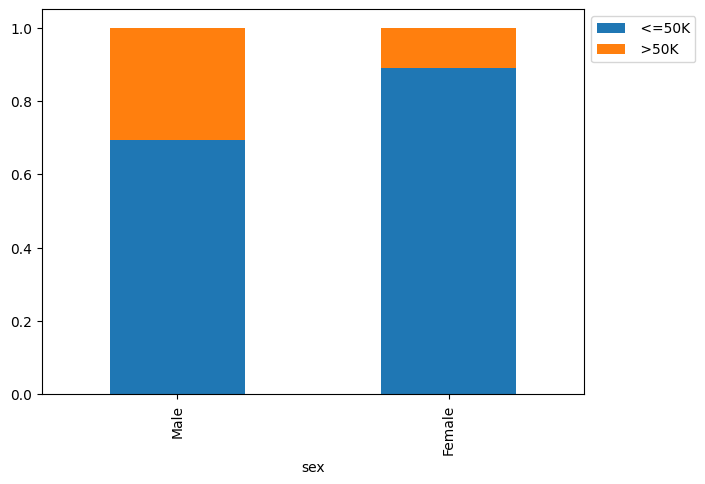

<IPython.core.display.Javascript object>

In [32]:
stacked_barplot(df, "sex", "salary")

* ~30% of the males have salary >50K whereas only ~10% of the females have salary >50K.
* This shows the pay gap that exists in society and the government should investigate further on it to formulate policy to ensure equal pay.

#### salary vs education

salary         <=50K   >50K    All
education                         
All            24692   7839  32531
Bachelors       3132   2221   5353
HS-grad         8816   1674  10490
Some-college    5894   1386   7280
Masters          763    959   1722
Prof-school      153    423    576
Assoc-voc       1021    361   1382
Doctorate        107    306    413
Assoc-acdm       802    265   1067
10th             871     62    933
11th            1115     60   1175
7th-8th          605     40    645
12th             400     33    433
9th              487     27    514
5th-6th          316     16    332
1st-4th          160      6    166
Preschool         50      0     50
------------------------------------------------------------------------------------------------------------------------


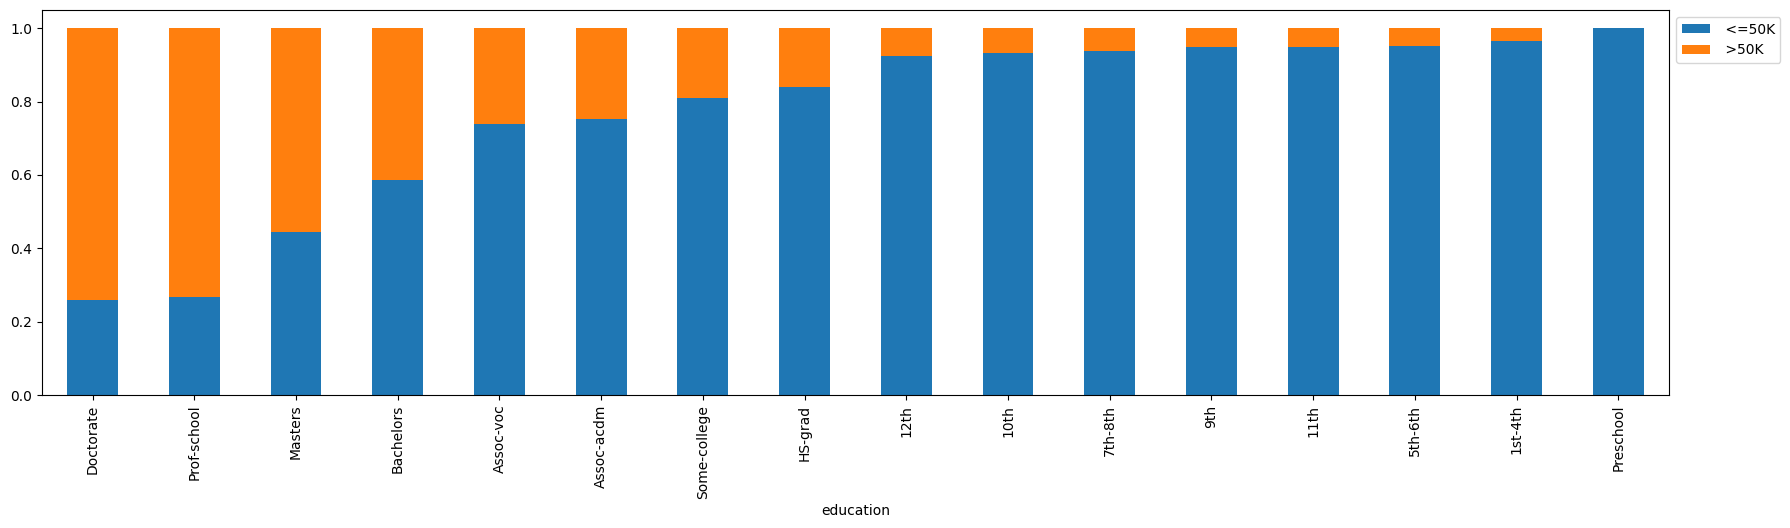

<IPython.core.display.Javascript object>

In [33]:
stacked_barplot(df, "education", "salary")

* ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above $50K.
* This clearly shows a positive relationship between education and salary, the higher the education higher is the salary.

#### salary vs occupation

salary              <=50K   >50K    All
occupation                             
All                 24692   7839  32531
Exec-managerial      2097   1968   4065
Prof-specialty       2278   1858   4136
Sales                2666    983   3649
Craft-repair         3164    929   4093
Adm-clerical         3259    507   3766
Transport-moving     1277    320   1597
Tech-support          644    283    927
Machine-op-inspct    1750    249   1999
Protective-serv       438    211    649
Unknown              1652    191   1843
Other-service        3153    137   3290
Farming-fishing       877    115    992
Handlers-cleaners    1283     86   1369
Armed-Forces            8      1      9
Priv-house-serv       146      1    147
------------------------------------------------------------------------------------------------------------------------


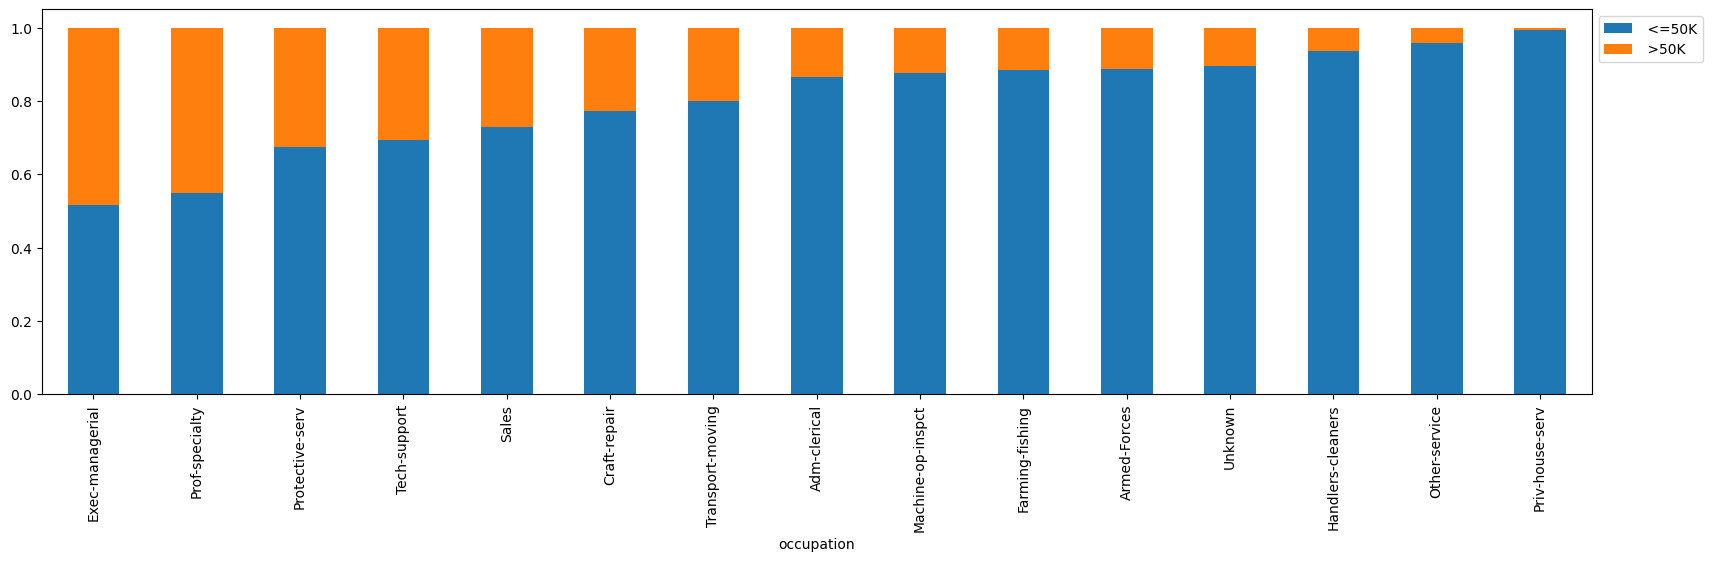

<IPython.core.display.Javascript object>

In [34]:
stacked_barplot(df, "occupation", "salary")

- ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above $50,000
- People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.

#### salary vs workclass

salary             <=50K   >50K    All
workclass                             
All                24692   7839  32531
Private            17706   4961  22667
Self-emp-not-inc    1816    724   2540
Self-emp-inc         494    622   1116
Local-gov           1476    617   2093
Federal-gov          589    371    960
State-gov            945    353   1298
Unknown             1645    191   1836
Never-worked           7      0      7
Without-pay           14      0     14
------------------------------------------------------------------------------------------------------------------------


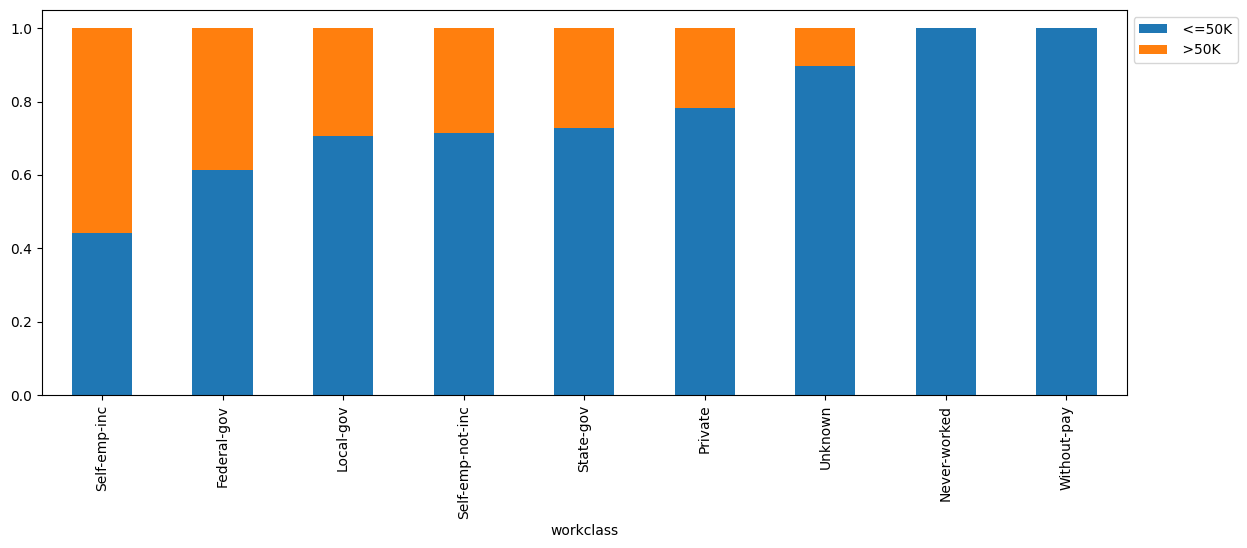

<IPython.core.display.Javascript object>

In [35]:
stacked_barplot(df, "workclass", "salary")

* ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K.
* ~20% of the people working in the private sector earn more than 50K.

#### salary vs age

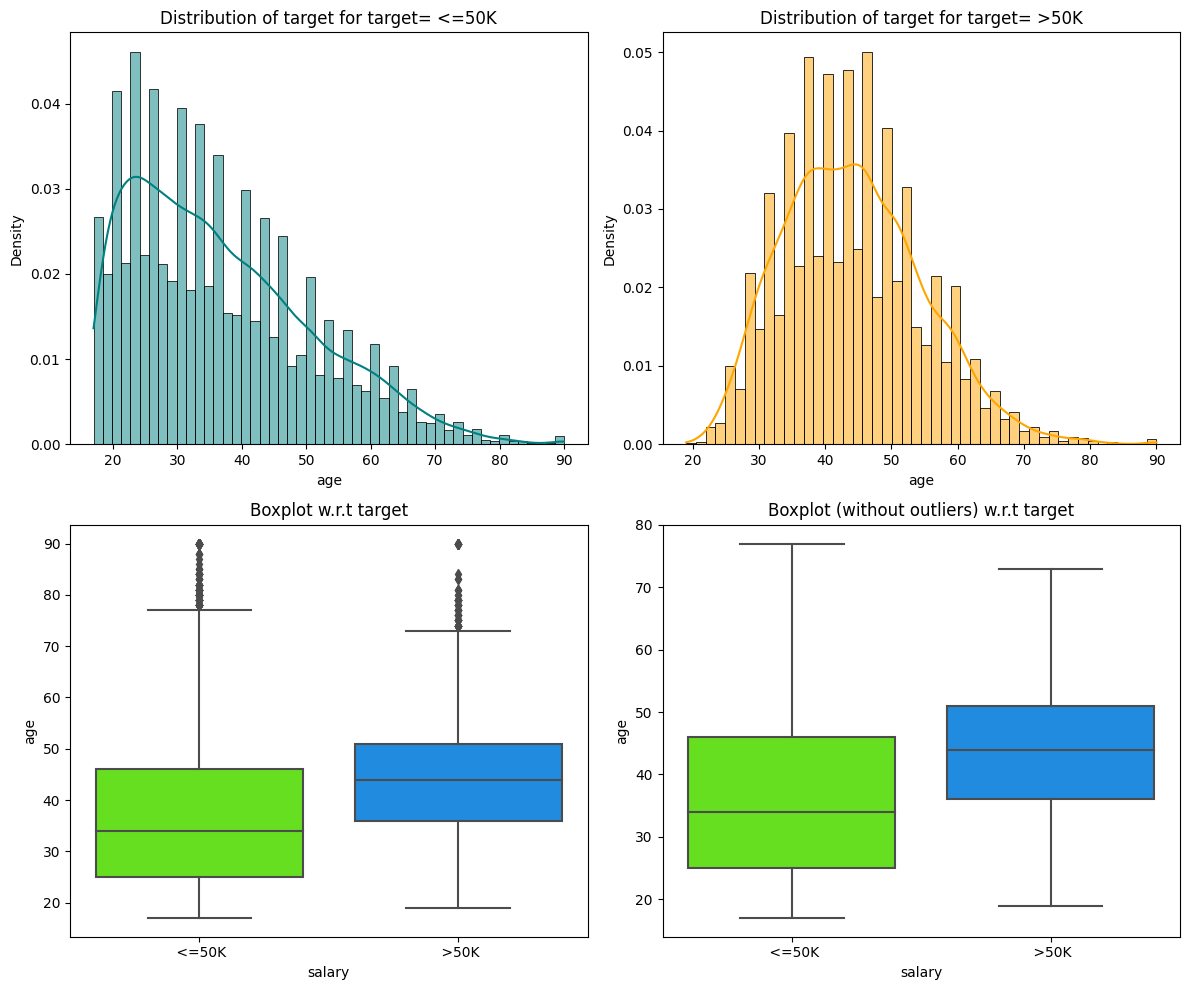

<IPython.core.display.Javascript object>

In [36]:
distribution_plot_wrt_target(df, "age", "salary")

* People who more than 50K salary are generally older having an average age of around 48 years.
* People who have less than 50K salary have an average age of around 36.

#### salary vs working_hours_per_week

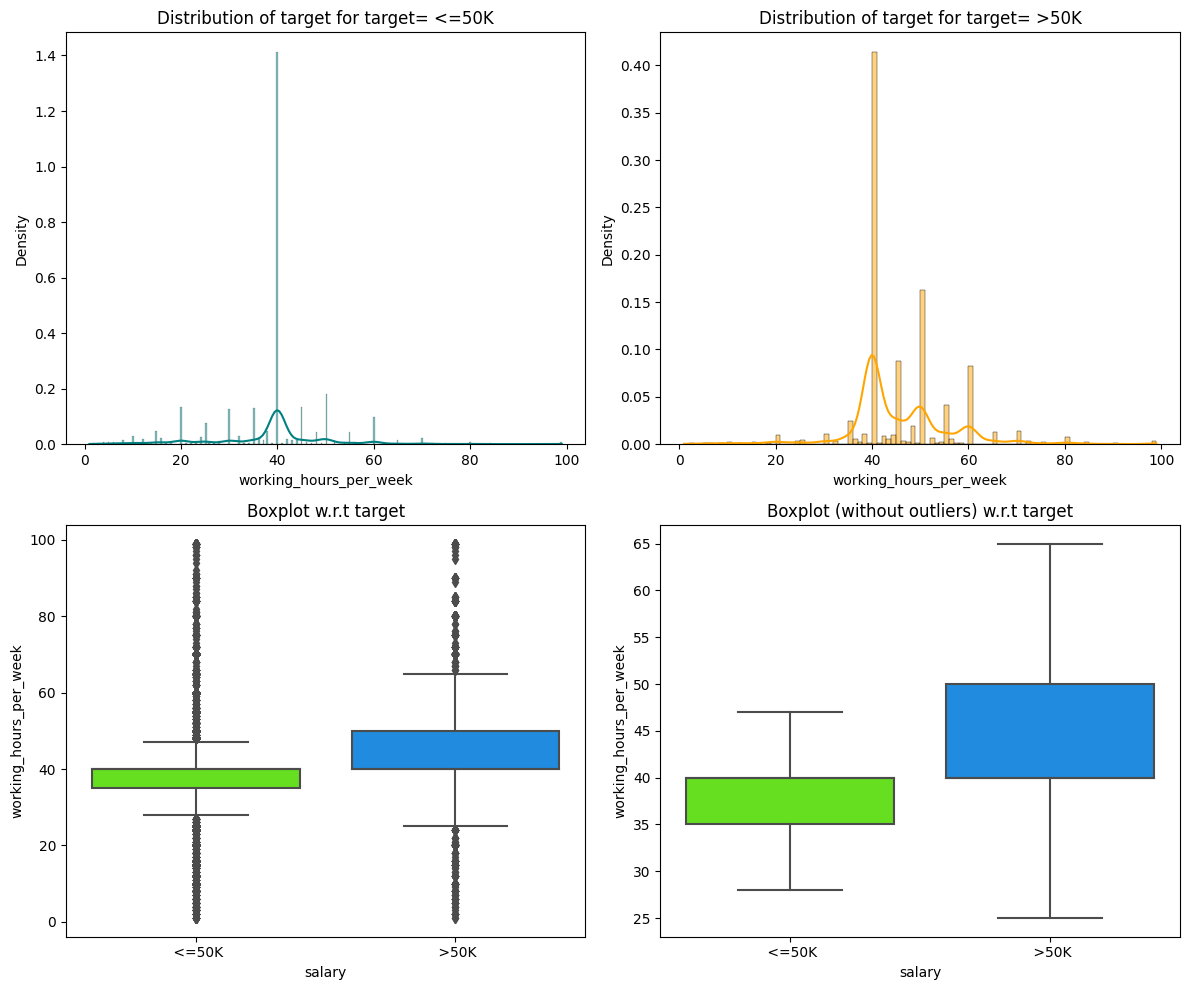

<IPython.core.display.Javascript object>

In [37]:
distribution_plot_wrt_target(df, "working_hours_per_week", "salary")

* Majority of people having above 50K salary work around 40 hours per week.
* Those having >50K salary have a higher range of working hours as compared to the ones with <=50K, but there are outliers present.

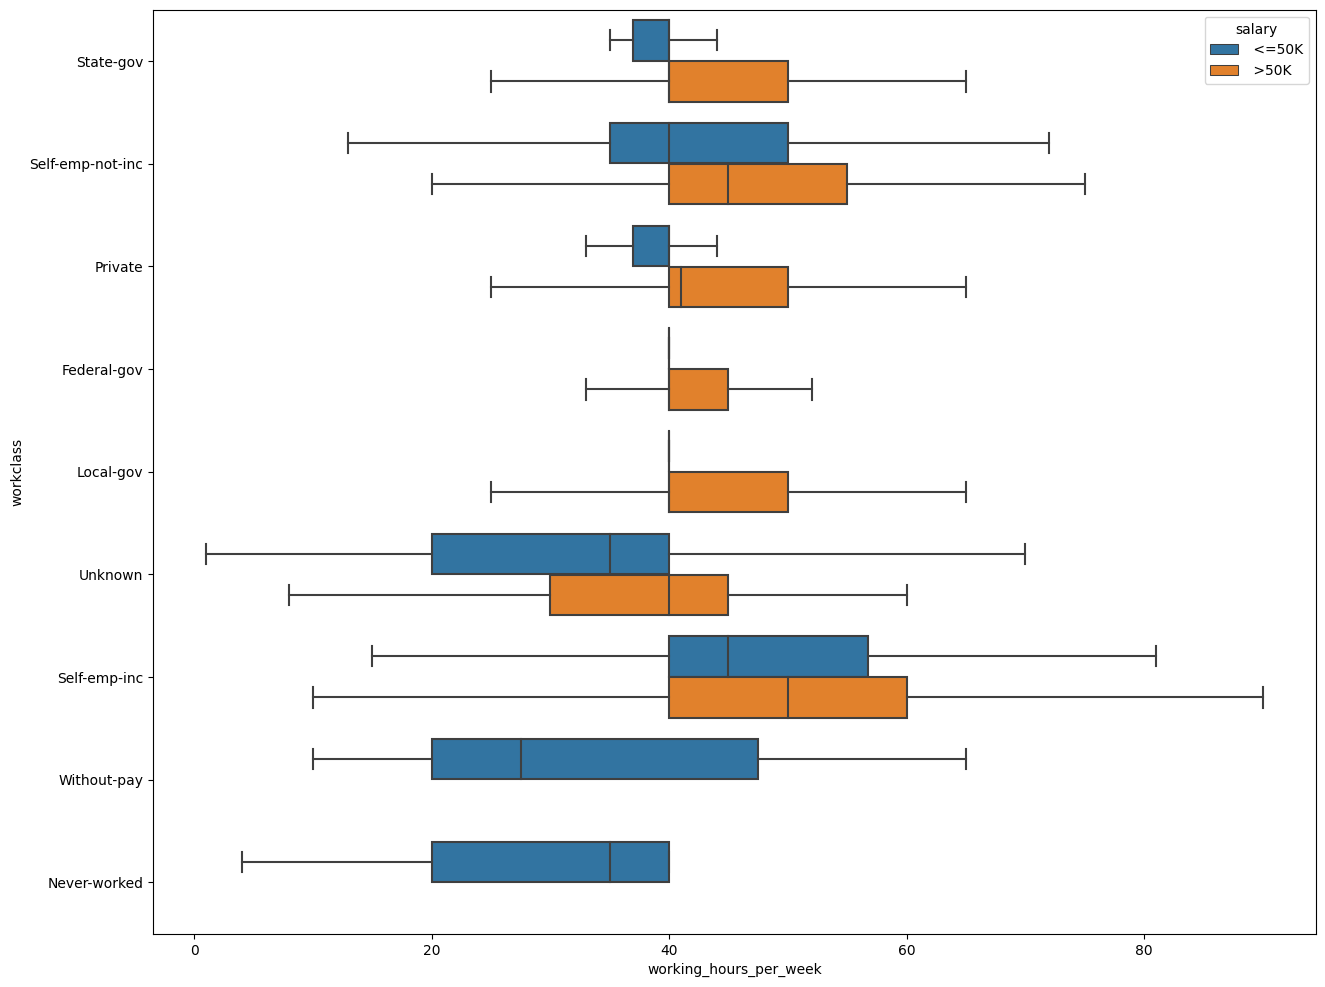

<IPython.core.display.Javascript object>

In [38]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="workclass", x="working_hours_per_week", data=df, hue="salary", showfliers=False
)
plt.show()

* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.
* Without pay and never worked will have no income or less than 50K income.
* The number of working hours for many government employees is concentrated at 40 hrs a week, which makes sense as government employees generally have fixed working hours.

**Actions for data pre-processing**:

* Many variables have outliers that need to be treated.
* We can drop capital_gain and capital_loss as most of the observations are 0 in these variables, and if the government already knows a person's capital gain or loss it will be easier for them to classify a person into a salary group.

## Data Preprocessing

* We can drop capital_gain and capital_loss as most of the observations are 0 in these variables, and if the government already knows a person's capital gain or loss it will be easier for them to classify a person into a salary group
* There are many outliers in the data which we will treat (perform capping of outliers)
  * All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

**Dropping capital_gain and capital_loss**

In [39]:
data.drop(["capital_gain", "capital_loss"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Outlier Detection

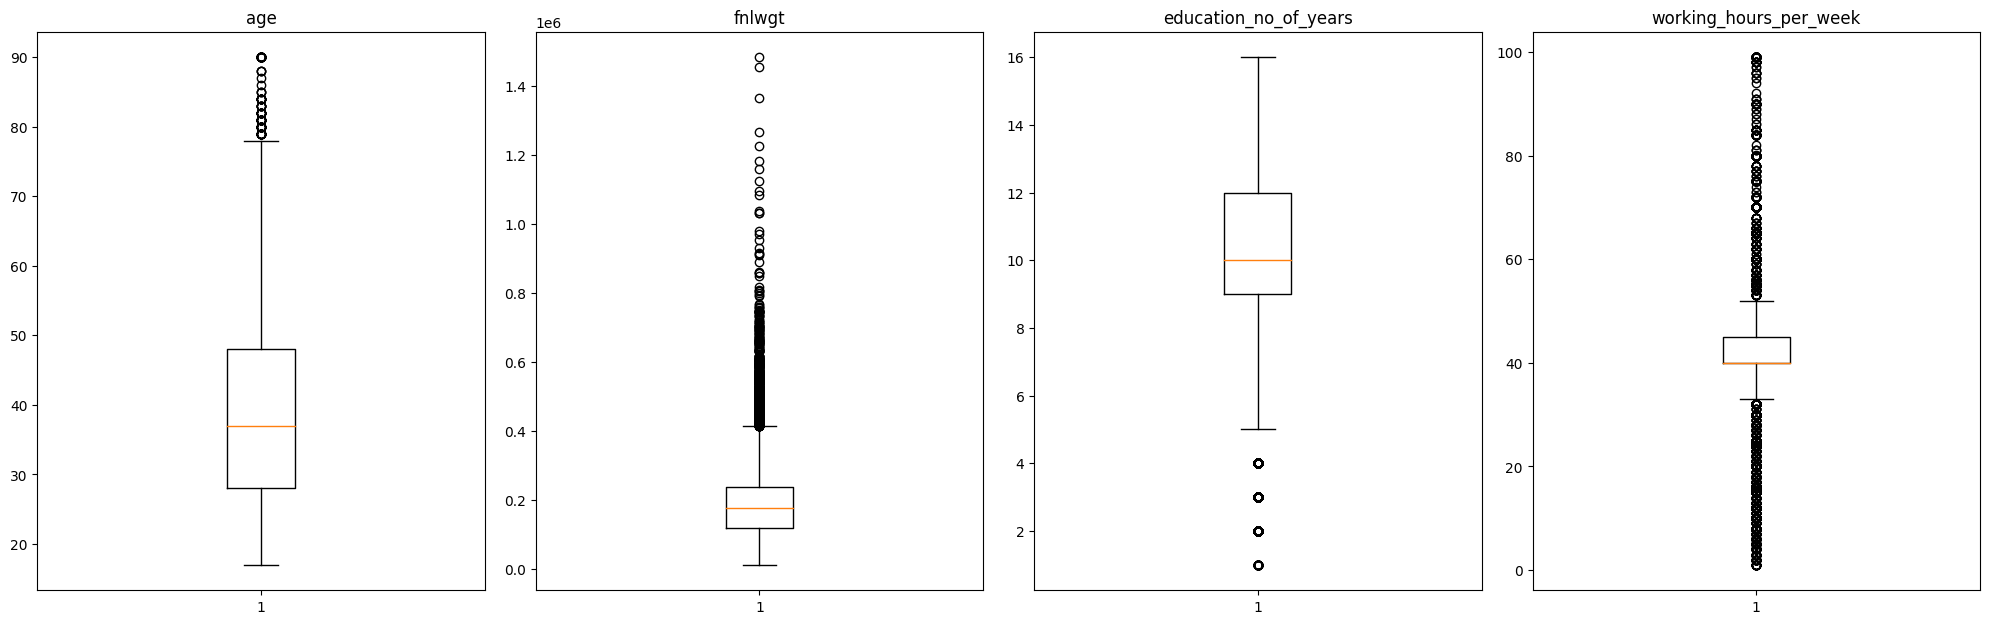

<IPython.core.display.Javascript object>

In [40]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Age and fnlwgt have upper outliers. 
* education_no_years has lower outliers. 
* working_hours_per_week has both upper and lower outliers.

### Outlier Treatment

In [41]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [42]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, numerical_col)

<IPython.core.display.Javascript object>

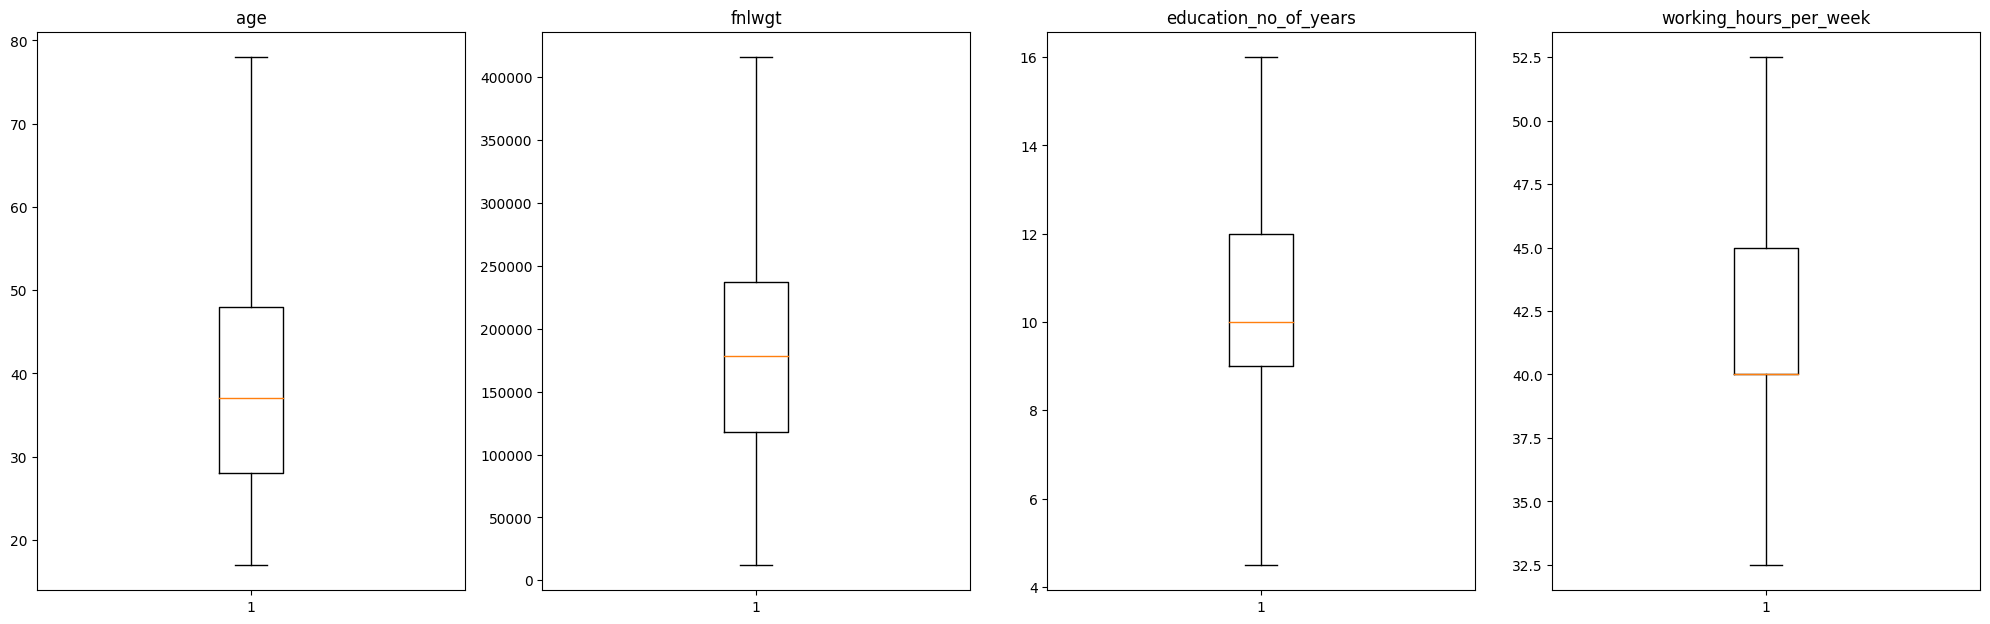

<IPython.core.display.Javascript object>

In [43]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for Modeling

**Encoding >50K as 0 and <=50K as 1 as government wants to find underprivileged section of society.**

In [44]:
data["salary"] = data["salary"].apply(lambda x: 1 if x == " <=50K" else 0)

<IPython.core.display.Javascript object>

**Creating training and test sets.**

In [45]:
# specifying the independent  and dependent variables
X = data.drop(["salary"], axis=1)
Y = data["salary"]

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [46]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (22771, 53)
Shape of test set :  (9760, 53)
Percentage of classes in training set:
1    0.758026
0    0.241974
Name: salary, dtype: float64
Percentage of classes in test set:
1    0.761373
0    0.238627
Name: salary, dtype: float64


<IPython.core.display.Javascript object>

## Model Building - Logistic Regression

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

In [47]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22720
Method:                           MLE   Df Model:                           50
Date:                Fri, 10 Feb 2023   Pseudo R-squ.:                  0.3678
Time:                        08:45:52   Log-Likelihood:                -7965.8
converged:                      False   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               9.5200        nan        nan        nan         nan         nan
age                                -0.0314      0.002    -17.126    

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient show that the probability of a person having a salary less than 50K decreases with the increase of the corresponding attribute value.
 
- Positive values of the coefficient show that the probability of a person having a salary less than 50K increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

### Model Performance Evaluation

**Model can make wrong predictions as**:

1. Predicting a person has a salary <=50K but in reality the salary of the person is >50K.

2. Predicting a person doesn't have a salary <=50K but in reality the salary of the person is <=50k.

**Which case is more important?** 

* Both the cases are important as:

  * If we predict a person has a salary <=50K but actually the salary is >50K then a wrong person will be getting the benefits of the scheme and government might lose resources.

  * If we predict a person doesn't have a salary <=50K but actually the salary is <=50K that person will not be able to avail the benefits of the scheme constituting to opportunity loss.


**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [48]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [49]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

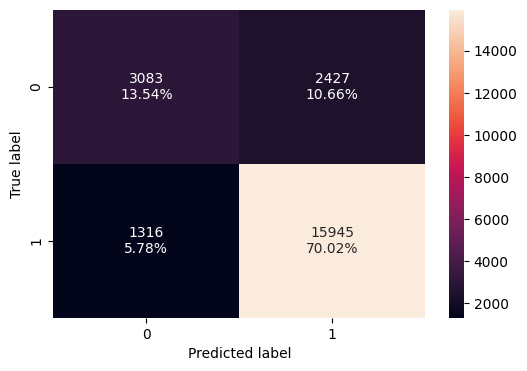

<IPython.core.display.Javascript object>

In [50]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [51]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.835624,0.923759,0.867897,0.894957


<IPython.core.display.Javascript object>

**Observations**

- The f1_score of the model is ~0.89 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

### Detecting and Dealing with Multicollinearity

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model. 

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [52]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                               0.000000
age                                 1.531401
fnlwgt                              1.037491
education_no_of_years                    inf
working_hours_per_week              1.237162
workclass_Local-gov                 3.041470
workclass_Never-worked                   inf
workclass_Private                   7.717533
workclass_Self-emp-inc              2.217152
workclass_Self-emp-not-inc          3.487046
workclass_State-gov                 2.317984
workclass_Unknown                        inf
workclass_Without-pay               1.015562
education_11th                           inf
education_12th                           inf
education_1st-4th                        inf
education_5th-6th                        inf
education_7th-8th                        inf
education_9th                            inf
education_Assoc-acdm                     inf
education_Assoc-voc                      inf
education_Bachelors 

<IPython.core.display.Javascript object>

* `education_no_of_years`, `education`, and some categorical levels of `workclass`, `native_country`, and `race` exhibit high multicollinearity

* We see that some variables have *inf* values for VIF
  * The *inf* values for VIF indicate perfect correlation between variables

* As we saw in our earlier analysis that wherever workclass has unknown values occupation is also unknown.
  * The high correlation between these variables has been highlighted in the VIF values as well

* We will drop `occupation_Unknown` as we get the same information from `workclass_Unknown`

**Removing `occupation_Unknown`**

In [53]:
X_train1 = X_train.drop("occupation_Unknown", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                               0.000000
age                                 1.531401
fnlwgt                              1.037491
education_no_of_years                    inf
working_hours_per_week              1.237162
workclass_Local-gov                 3.041470
workclass_Never-worked              1.012785
workclass_Private                   7.717533
workclass_Self-emp-inc              2.217152
workclass_Self-emp-not-inc          3.487046
workclass_State-gov                 2.317984
workclass_Unknown                   3.039325
workclass_Without-pay               1.015562
education_11th                           inf
education_12th                           inf
education_1st-4th                        inf
education_5th-6th                        inf
education_7th-8th                        inf
education_9th                            inf
education_Assoc-acdm                     inf
education_Assoc-voc                      inf
education_Bachelors 

<IPython.core.display.Javascript object>

* `education_no_of_years` and `education` also capture similar information and hence, it is understandable that they have high VIF values

* We will be dropping `education_no_of_years` and `education` one at a time, building separate models, and checking their performances to see which variable has a significant impact on the model's performance

**Dropping `education_no_of_years`**

In [54]:
X_train2 = X_train1.drop("education_no_of_years", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const                              326.271888
age                                  1.531401
fnlwgt                               1.037491
working_hours_per_week               1.237162
workclass_Local-gov                  3.041470
workclass_Never-worked               1.012785
workclass_Private                    7.717533
workclass_Self-emp-inc               2.217152
workclass_Self-emp-not-inc           3.487046
workclass_State-gov                  2.317984
workclass_Unknown                    3.039325
workclass_Without-pay                1.015562
education_11th                       2.147415
education_12th                       1.422410
education_1st-4th                    1.188352
education_5th-6th                    1.338683
education_7th-8th                    1.655272
education_9th                        1.524978
education_Assoc-acdm                 2.105382
education_Assoc-voc                  2.374490
education_Bachelors                  5.939193

<IPython.core.display.Javascript object>

* Dropping education_no_of_years fixes the multicollinearity in education column.

In [55]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.835624,0.923759,0.867897,0.894957


<IPython.core.display.Javascript object>

* No significant change in the model performance.

**Observations:**
1. Dropping education_no_of_years, race_ White doesn't have a significant impact on the model performance.
2. We can choose any model to proceed to the next steps.
3. Some of the categorical levels of a variable have VIF>5 which can simply be ignored.

In [56]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22720
Method:                           MLE   Df Model:                           50
Date:                Fri, 10 Feb 2023   Pseudo R-squ.:                  0.3678
Time:                        08:46:06   Log-Likelihood:                -7965.8
converged:                      False   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               8.3433      0.405     20.584      0.000       7.549       9.138
age                                -0.0314      0.002    -17.126    

<IPython.core.display.Javascript object>

### Removing high p-value variables

* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [57]:
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'age', 'fnlwgt', 'working_hours_per_week', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'education_1st-4th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Prof-school', 'education_Some-college', 'marital_status_married', 'marital_status_not_married', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'race_Other', 'race_White', 'native_contienent_other', 'native_contienent_south_america']


<IPython.core.display.Javascript object>

In [58]:
X_train3 = X_train2[selected_features]

<IPython.core.display.Javascript object>

In [59]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:                 salary   No. Observations:                22771
Model:                          Logit   Df Residuals:                    22735
Method:                           MLE   Df Model:                           35
Date:                Fri, 10 Feb 2023   Pseudo R-squ.:                  0.3666
Time:                        08:46:10   Log-Likelihood:                -7980.7
converged:                       True   LL-Null:                       -12600.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               8.0557      0.233     34.544      0.000       7.599       8.513
age                                -0.0314      0.002    -17.178    

<IPython.core.display.Javascript object>

age negative coef =) negative impact

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train3* as the final ones and *lg3* as final model.**

### Coefficient Interpretations

* Coefficient of some levels of education, workclass, and native country are positive an increase in these will lead to increase in chances of a person having <=50K salary. 

* Coefficient of age, fnlwgt, marital_status, working_hours_per_week, some levels of education, workclass, and native country are negative increase in these will lead to decrease in chances of a person having <=50K salary.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [60]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,const,age,fnlwgt,working_hours_per_week,workclass_Local-gov,workclass_Private,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Unknown,education_1st-4th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_married,marital_status_not_married,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,race_Other,race_White,native_contienent_other,native_contienent_south_america
Odds,3151.769230,0.969130,0.999999,0.937106,1.840620,1.431156,2.228214,2.180033,2.968489,4.947805,1.852163,1.809587,0.277548,0.254854,0.137414,0.054548,0.458036,0.092492,0.043336,0.341689,0.075834,0.674683,0.489944,2.887110,2.215304,1.468939,2.656708,11.291126,0.620316,0.577698,0.855304,0.532832,1.976960,0.856834,1.573320,3.524735
Change_odd%,315076.922967,-3.086978,-0.000063,-6.289395,84.062005,43.115618,122.821364,118.003275,196.848948,394.780514,85.216306,80.958691,-72.245187,-74.514571,-86.258563,-94.545220,-54.196379,-90.750752,-95.666411,-65.831123,-92.416624,-32.531684,-51.005637,188.710981,121.530367,46.893899,165.670835,1029.112563,-37.968373,-42.230185,-14.469579,-46.716755,97.696049,-14.316591,57.332018,252.473541


<IPython.core.display.Javascript object>

Odds for age is 0.969

**Coefficient interpretations**

* `age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a person having salary <=50k by ~0.97 times or a ~3% decrease in odds of having salary <=50K.
* `working_hours_per_week`: Holding all other features constant a 1 unit change in the working_hours_per_week will decrease the odds of a person having salary <=50k by ~0.94 times or a decrease of ~6.3% decrease in odds of having salary <=50K.
* `marital_status`: The odds of a person whose marital status is married having a salary <=50K is ~0.076 less than the person who was never married or ~92.4% fewer odds of having salary <=50K than the person who was never married. Similarly, the odds of a person whose marital status is not_married having a salary <=50K is ~0.67 times less than the person who was never married or ~32.5% less odds of having a salary <=50K than the person who was never married. [the dropped category Never_married is taken as a reference level]
* `education`: The odds of a person who is HS-grad having salary <=50K is ~0.45 times less than the person who has done education 1st-9th, 11th or Preschool or ~54.1% fewer odds of having salary <=50K. Similarly, The odds of a person who has a Doctorate having a salary <=50K is 0.05 times less than the person who has done education 1st-9th or Preschool or ~95.00% less odds of having a salary <=50K. [the dropped categories education_ 1st-4th,education_ 5th-6th, education_ 7th-8th, education_ 9th, education_ 11th, education_ Preschool are taken as a reference level]

**Interpretation for other attributes can be done similarly.**

### Checking performance of the new model

**Training set performance**

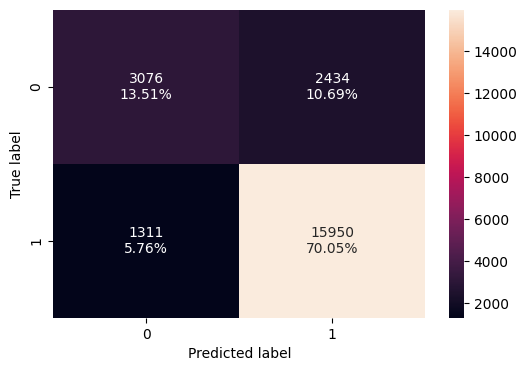

<IPython.core.display.Javascript object>

In [61]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train)

In [62]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg3, X_train3, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.835536,0.924048,0.867602,0.894936


<IPython.core.display.Javascript object>

**Test set performance**

- We have to first drop the columns from the test set that were dropped from the training set.

In [63]:
X_test3 = X_test[list(X_train3.columns)]

<IPython.core.display.Javascript object>

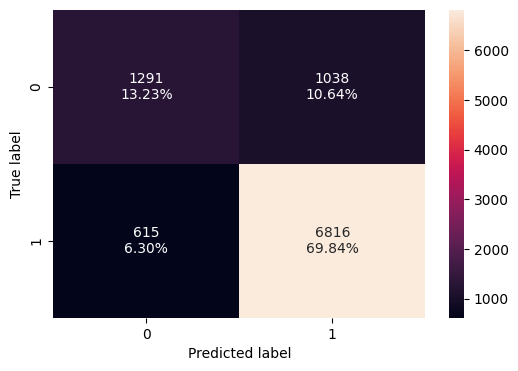

<IPython.core.display.Javascript object>

In [64]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test)

In [65]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.830635,0.917239,0.867838,0.891855


<IPython.core.display.Javascript object>

- The model is giving a good f1_score of ~0.895 and ~0.892 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

## Model Performance Improvement

* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

### ROC Curve and ROC-AUC

* ROC-AUC on training set

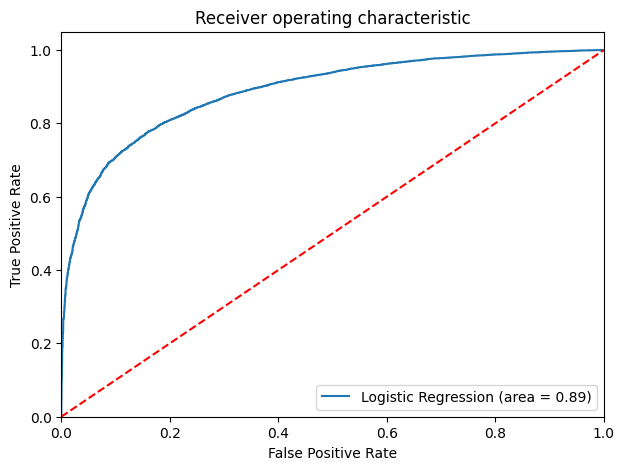

<IPython.core.display.Javascript object>

In [66]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--") # axis 9 to 1 in x and y, color red
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Optimal threshold using AUC-ROC curve

In [67]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.7579399407330089


<IPython.core.display.Javascript object>

thresh 0.75 v high could have .55 .6 b ut .75 v hi (F1 score think)  .75 will dec mod perform

**Checking model performance on training set**

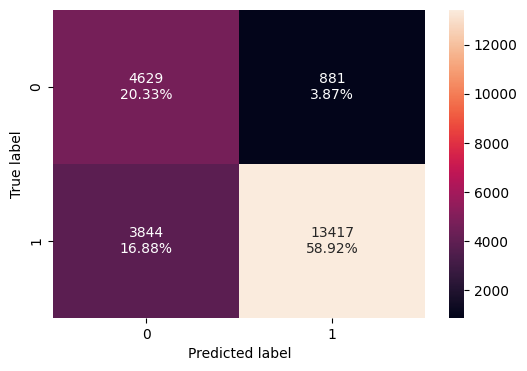

<IPython.core.display.Javascript object>

In [68]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [69]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.792499,0.777301,0.938383,0.85028


<IPython.core.display.Javascript object>

f1 score has reduced .85

* Precision of model has increased but the other metrics have reduced.
* The model is still giving a good performance.

**Checking model performance on test set**

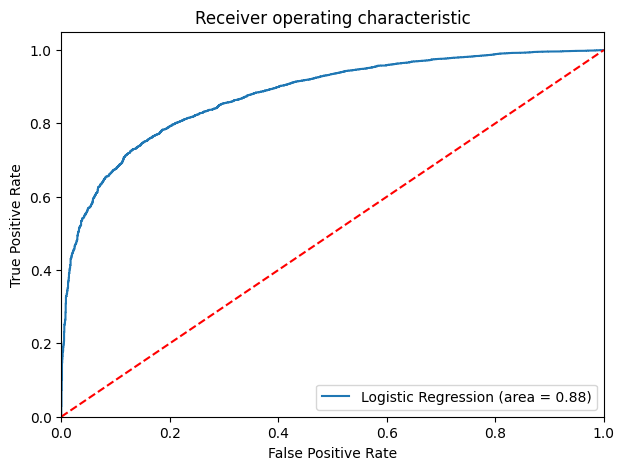

<IPython.core.display.Javascript object>

In [70]:
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

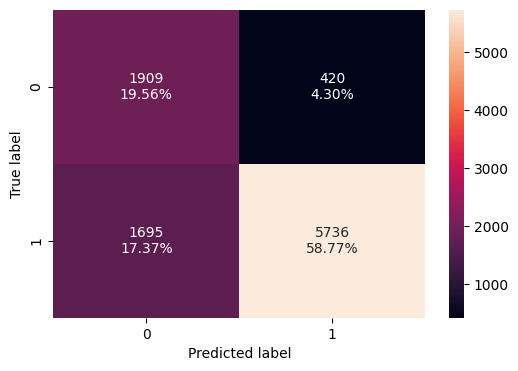

<IPython.core.display.Javascript object>

In [71]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [72]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.783299,0.771901,0.931774,0.844336


<IPython.core.display.Javascript object>

test performance is 84% was 89% previously, so___ did not work

### Precision-Recall Curve

y scores is just the y prediciton

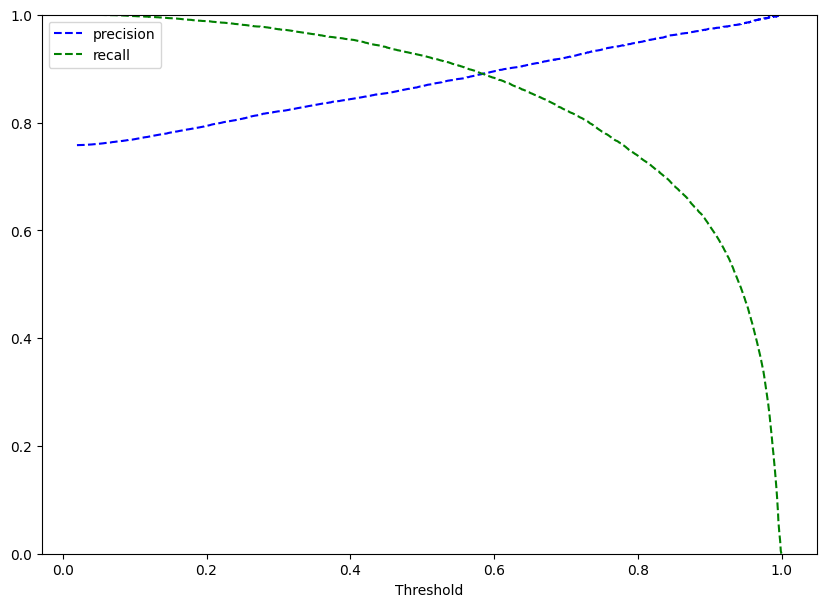

<IPython.core.display.Javascript object>

In [73]:
y_scores = lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds): # plots precision and recall for all vals of precision and recall
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre) # precision recall threshold
plt.show() # blue precision 

* At the threshold of 0.58, we get balanced recall and precision.

In [74]:
# setting the threshold
optimal_threshold_curve = 0.58

<IPython.core.display.Javascript object>

**Checking model performance on training set**

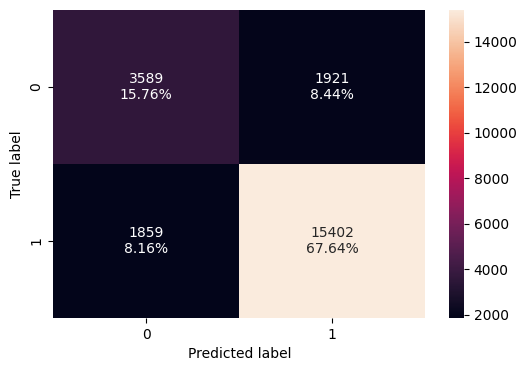

<IPython.core.display.Javascript object>

In [75]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train, threshold=optimal_threshold_curve)

In [76]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.833999,0.892301,0.889107,0.890701


<IPython.core.display.Javascript object>

model perf F1 increased

* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

**Checking model performance on test set**

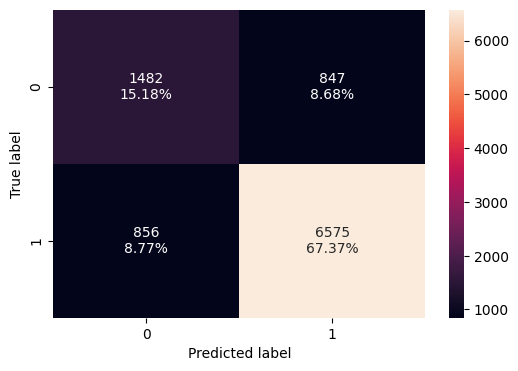

<IPython.core.display.Javascript object>

In [77]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_curve)

# saw imbalance classification problem
# logistic and linear difference
line straight v curbed

where class values fall in 0 class or 1 class

tuning by auc or roc method

true neg false pos etc

import metrics acc recall prec f1

focus on f1 when...

be precise with the doubts

50% completed 
dealing with new stuff
lot of different new concepts


pickle to api call server backend connect to get
classify food
pass image
to backend 
algo decides
pass to you

In [78]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.825512,0.884807,0.88588,0.885343


<IPython.core.display.Javascript object>

885 is v stable ?

## Model Performance Comparison and Final Model Selection

In [79]:
# training performance comparison

models_train_comp_df = pd.concat( # concat results from training and performance so see all results in one place
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T, # 2 sets like this 1 set for training 11 set for testing
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)", # these are col names, can shorten if want
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.835536,0.792499,0.833999
Recall,0.924048,0.777301,0.892301
Precision,0.867602,0.938383,0.889107
F1,0.894936,0.850280,0.890701


<IPython.core.display.Javascript object>

In [80]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.830635,0.783299,0.825512
Recall,0.917239,0.771901,0.884807
Precision,0.867838,0.931774,0.885880
F1,0.891855,0.844336,0.885343


<IPython.core.display.Javascript object>

- Almost all the three models are performing well on both training and test data without the problem of overfitting
- The model with a default threshold (0.5) is giving the best F1 score. Therefore it can be selected as the final model


## Conclusions and Recommendations

* We have been able to build a predictive model that can be used by the government to find the citizens having less than 50K salary with an f1_score of 0.89 on the training set and formulate policies accordingly.

* All the logistic regression models have given a generalized performance on the training and test set.

* Coefficient of some levels of education, workclass, and native country are positive an increase in these will lead to increase in chances of a person having <=50K salary. 

* Coefficient of age, fnlwgt, marital_status, working_hours_per_week,some levels of education, workclass, and native country are negative increase in these will lead to decrease in chances of a person having <=50K salary.

- The government should promote education among citizens, they should make policies to make education accessible to all, as we say in our analysis that people who have higher education are more likely to have a salary above 50,000 Dollars. 
- Working hours is one of the significant predictors of salary, The government should implement laws to ensure that people are paid fairly for their work and are not overworked for the increase in salaries. This would improve work-life balance.
- Reforms should be made for private-sector employees so that they are paid fairly for their work.
- Policy formulated by the government should be considerate of equal pay and counter the pay gap that exists in society.

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### Observations on fnlwgt

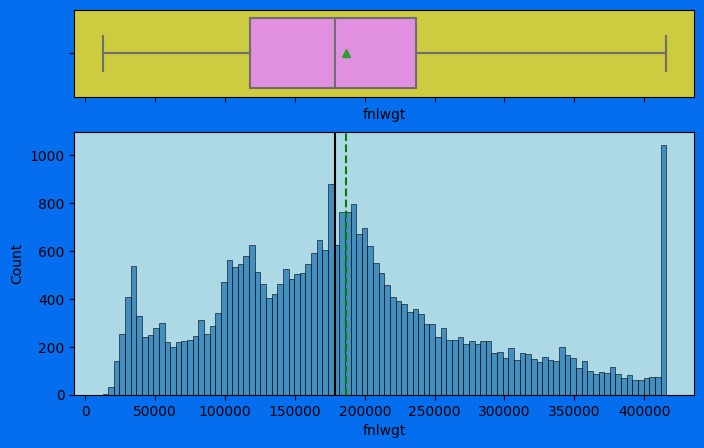

<IPython.core.display.Javascript object>

In [81]:
histogram_boxplot(df, "fnlwgt", bins=100)

* fnlwght is right-skewed. It has lots of outliers on the right side.

#### Observations on workclass

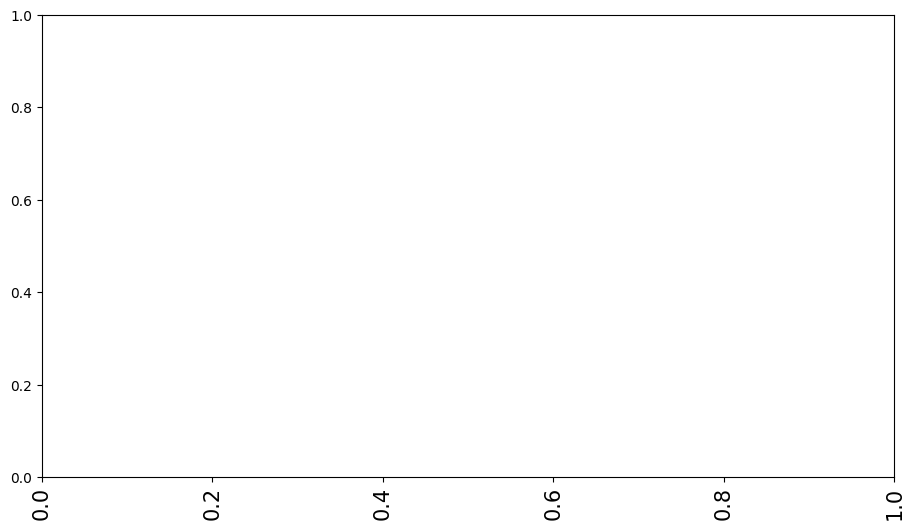

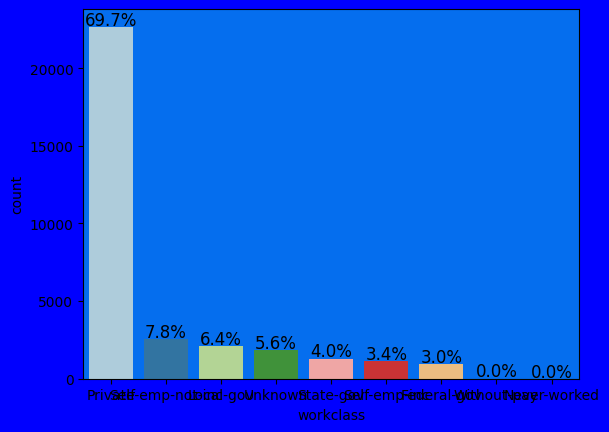

<IPython.core.display.Javascript object>

In [82]:
labeled_barplot(df, "workclass", perc=True)

* ~70% of the observations are from the Private sector working class.
* As expected from the number of hours per week.

#### Observations on marital_status

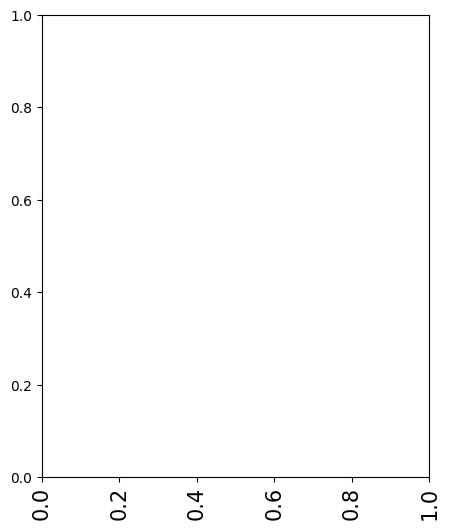

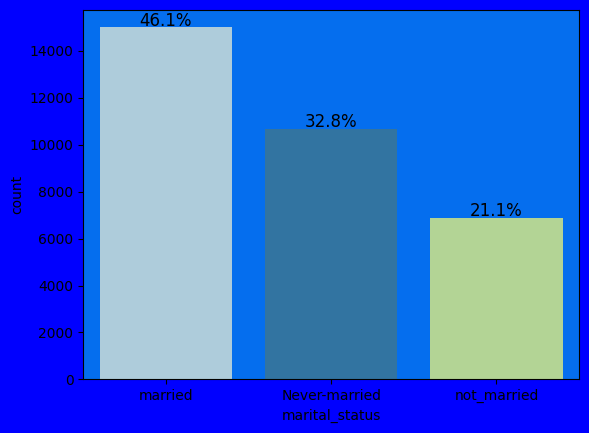

<IPython.core.display.Javascript object>

In [83]:
labeled_barplot(df, "marital_status", perc=True)

* 46.1% of the observations in the dataset are married followed by 32.8% of the people who never married.

#### Observations on salary

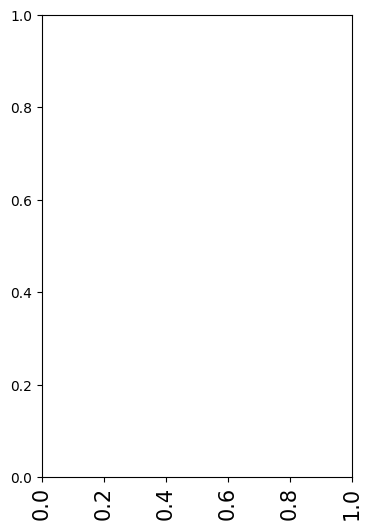

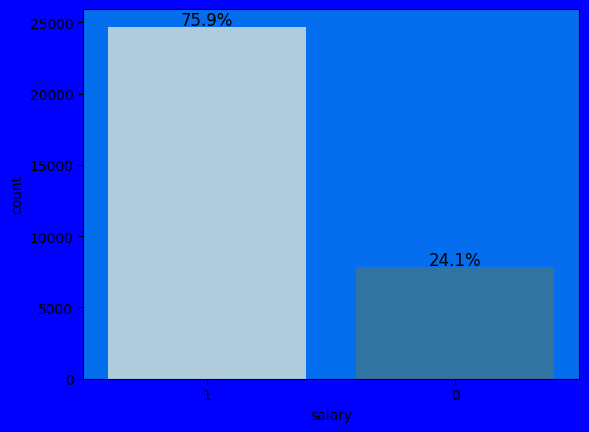

<IPython.core.display.Javascript object>

In [84]:
labeled_barplot(df, "salary", perc=True)

* ~24% of the observations have a salary above 50K and while ~76% have a salary below 50K

### Bivariate analysis

#### Correlation Check

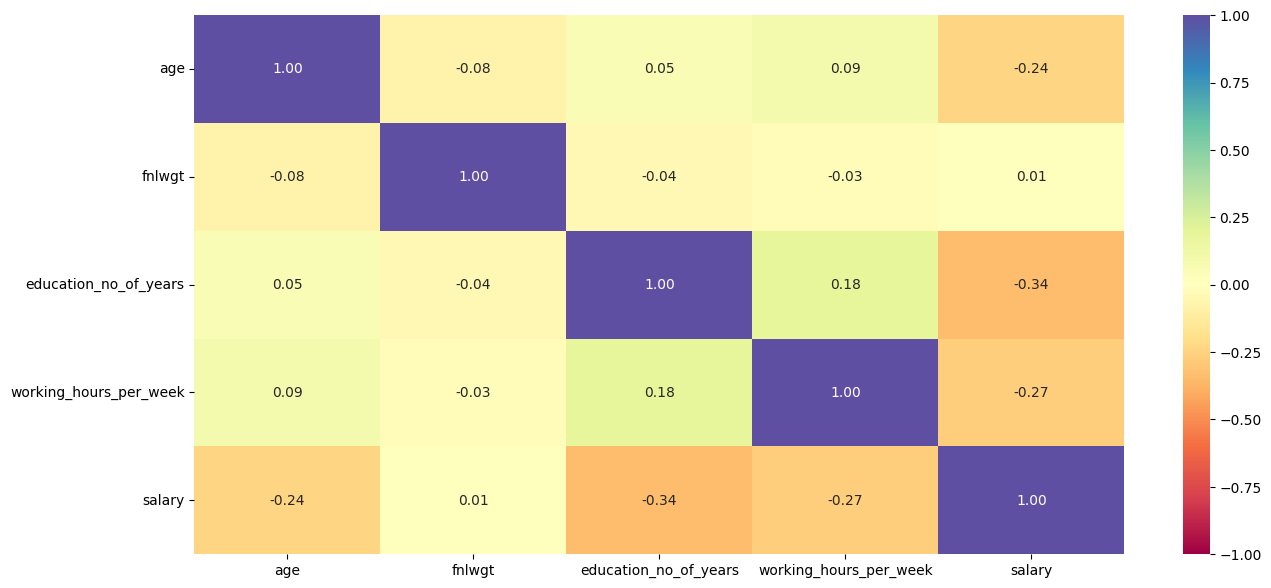

<IPython.core.display.Javascript object>

In [85]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no significant correlation between the columns.

#### salary vs sex

salary     0      1    All
sex                       
All     7839  24692  32531
Male    6660  15113  21773
Female  1179   9579  10758
------------------------------------------------------------------------------------------------------------------------


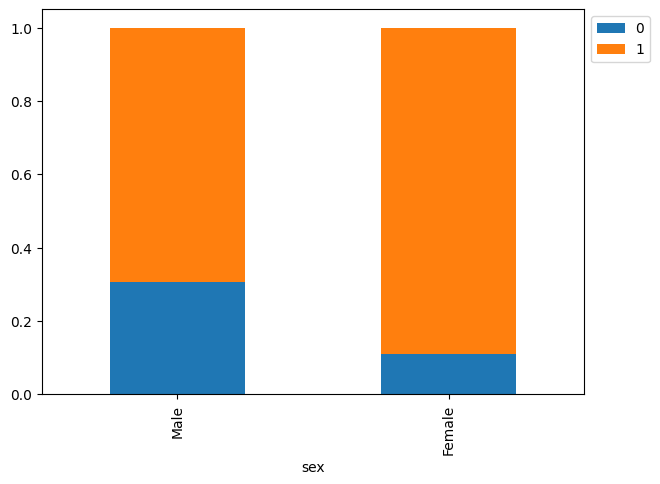

<IPython.core.display.Javascript object>

In [86]:
stacked_barplot(df, "sex", "salary")

* ~30% of the males have salary >50K whereas only ~10% of the females have salary >50K.
* This shows the pay gap that exists in society and the government should investigate further on it to formulate policy to ensure equal pay.

#### salary vs education

salary           0      1    All
education                       
All           7839  24692  32531
Bachelors     2221   3132   5353
HS-grad       1674   8816  10490
Some-college  1386   5894   7280
Masters        959    763   1722
Prof-school    423    153    576
Assoc-voc      361   1021   1382
Doctorate      306    107    413
Assoc-acdm     265    802   1067
10th            62    871    933
11th            60   1115   1175
7th-8th         40    605    645
12th            33    400    433
9th             27    487    514
5th-6th         16    316    332
1st-4th          6    160    166
Preschool        0     50     50
------------------------------------------------------------------------------------------------------------------------


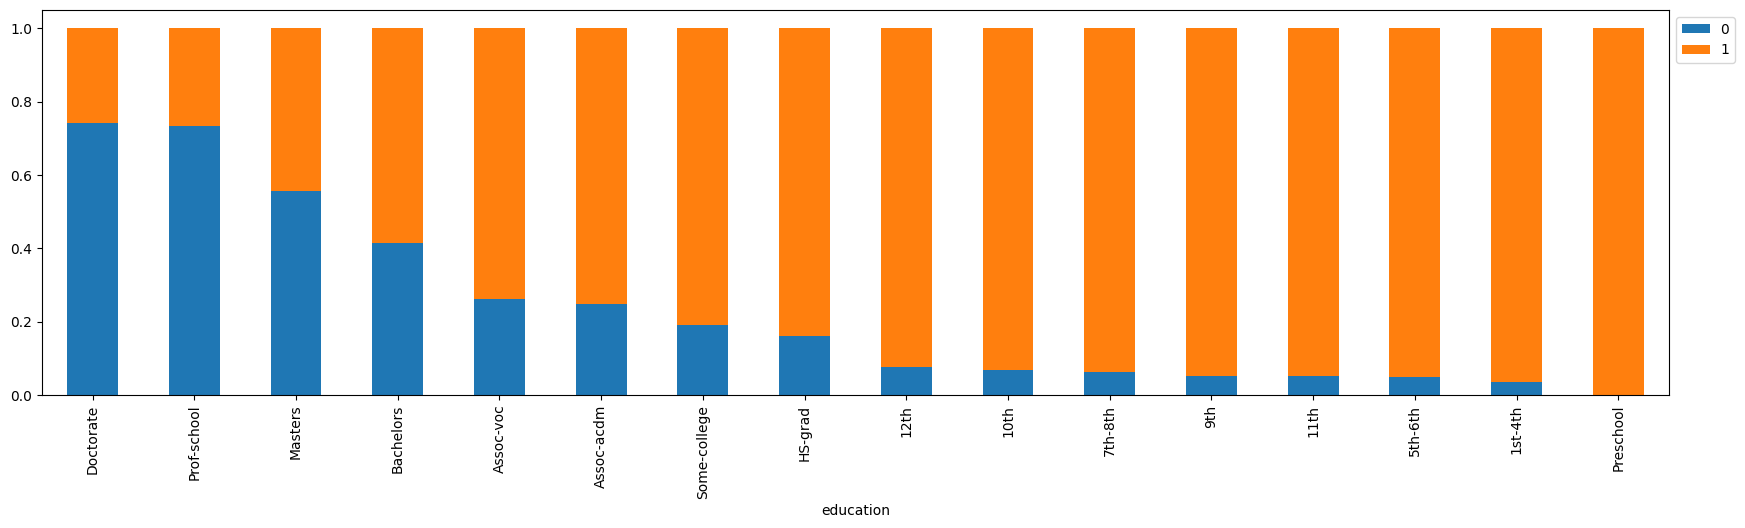

<IPython.core.display.Javascript object>

In [87]:
stacked_barplot(df, "education", "salary")

* ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above $50K.
* This clearly shows a positive relationship between education and salary, the higher the education higher is the salary.

#### salary vs occupation

salary                0      1    All
occupation                           
All                7839  24692  32531
Exec-managerial    1968   2097   4065
Prof-specialty     1858   2278   4136
Sales               983   2666   3649
Craft-repair        929   3164   4093
Adm-clerical        507   3259   3766
Transport-moving    320   1277   1597
Tech-support        283    644    927
Machine-op-inspct   249   1750   1999
Protective-serv     211    438    649
Unknown             191   1652   1843
Other-service       137   3153   3290
Farming-fishing     115    877    992
Handlers-cleaners    86   1283   1369
Armed-Forces          1      8      9
Priv-house-serv       1    146    147
------------------------------------------------------------------------------------------------------------------------


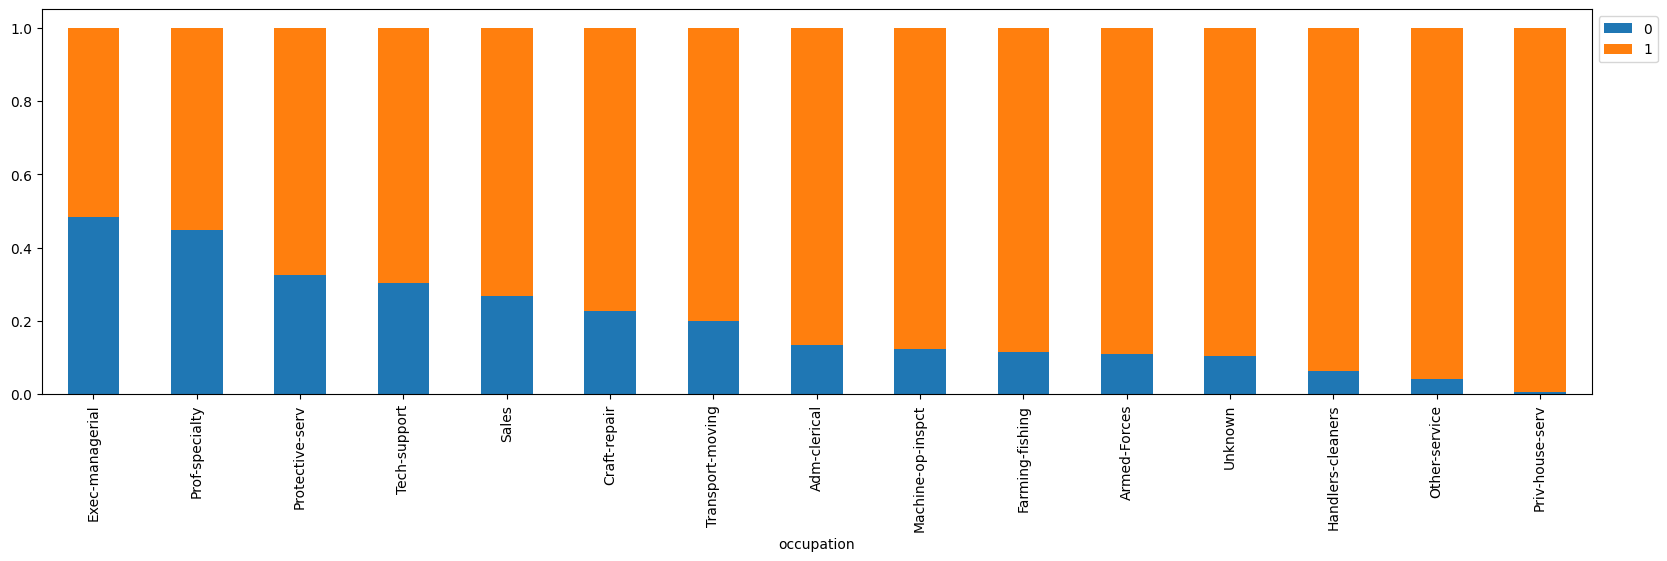

<IPython.core.display.Javascript object>

In [88]:
stacked_barplot(df, "occupation", "salary")

- ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above $50,000
- People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.

#### salary vs race

salary                 0      1    All
race                                  
All                 7839  24692  32531
White               7115  20674  27789
Black                387   2735   3122
Asian-Pac-Islander   276    762   1038
Amer-Indian-Eskimo    36    275    311
Other                 25    246    271
------------------------------------------------------------------------------------------------------------------------


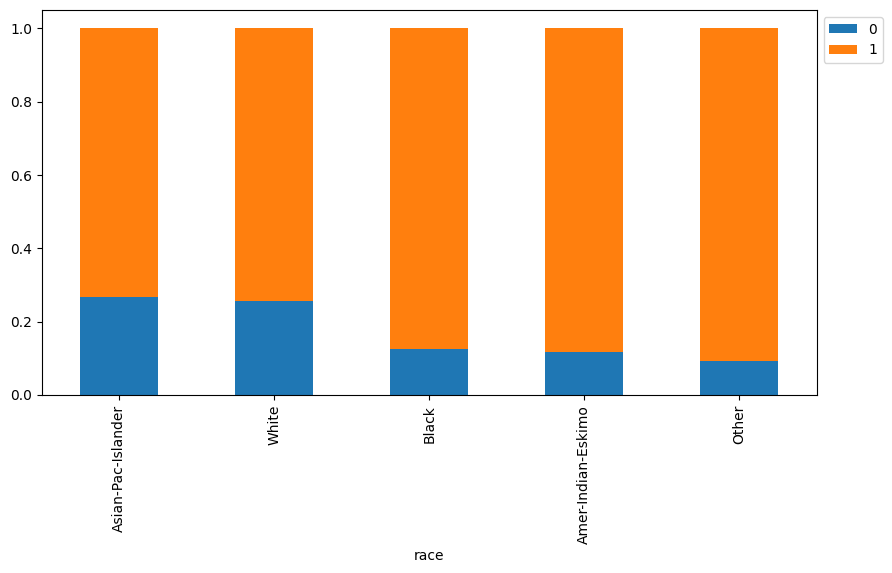

<IPython.core.display.Javascript object>

In [89]:
stacked_barplot(df, "race", "salary")

* 25% of the White and Asia-Pacific people have a salary more than 50K salary as compared to people from other race.

#### salary vs workclass

salary               0      1    All
workclass                           
All               7839  24692  32531
Private           4961  17706  22667
Self-emp-not-inc   724   1816   2540
Self-emp-inc       622    494   1116
Local-gov          617   1476   2093
Federal-gov        371    589    960
State-gov          353    945   1298
Unknown            191   1645   1836
Never-worked         0      7      7
Without-pay          0     14     14
------------------------------------------------------------------------------------------------------------------------


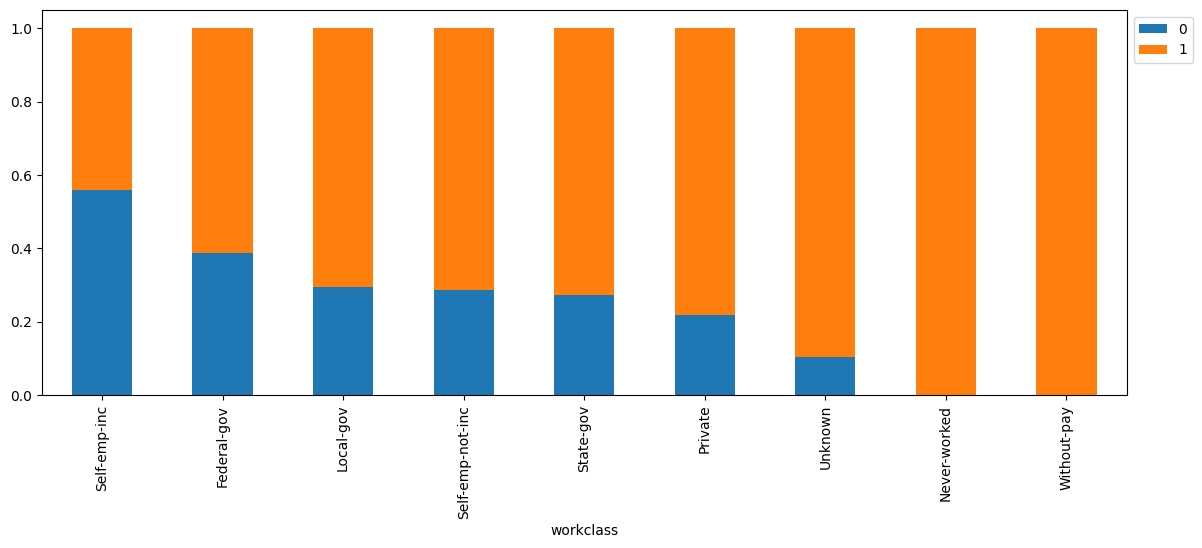

<IPython.core.display.Javascript object>

In [90]:
stacked_barplot(df, "workclass", "salary")

* ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K.
* ~20% of the people working in the private sector earn more than 50K.

#### salary vs marital_status

salary             0      1    All
marital_status                    
All             7839  24692  32531
married         6700   8293  14993
not_married      648   6229   6877
Never-married    491  10170  10661
------------------------------------------------------------------------------------------------------------------------


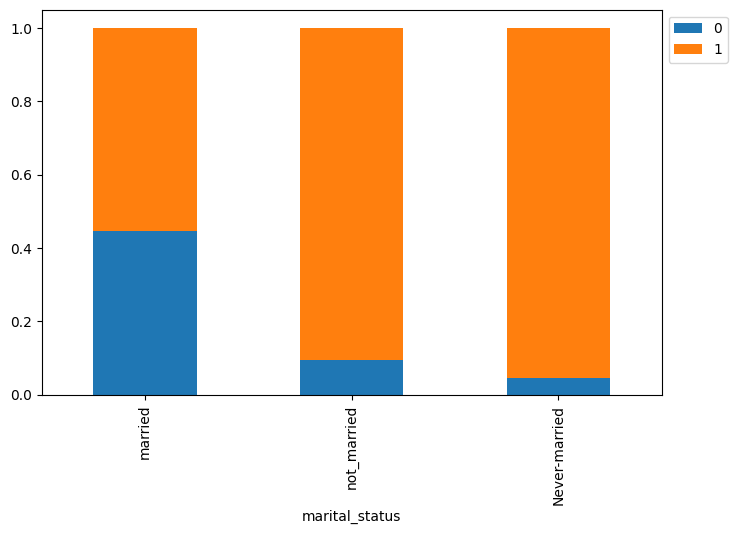

<IPython.core.display.Javascript object>

In [91]:
stacked_barplot(df, "marital_status", "salary")

* Married people have a higher likelihood of getting a salary above 50K compared to Never Married and Not married people.

#### salary vs age

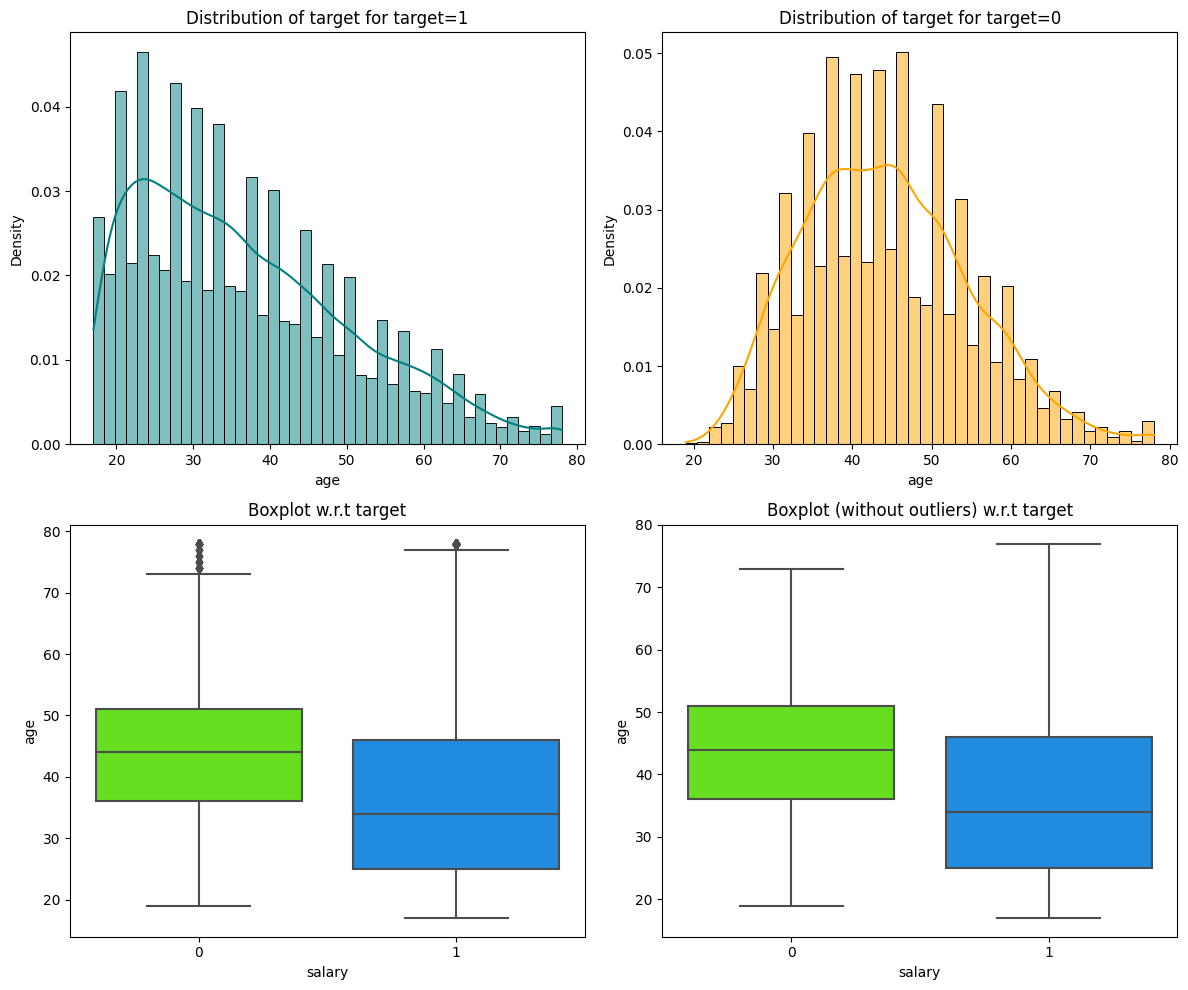

<IPython.core.display.Javascript object>

In [92]:
distribution_plot_wrt_target(df, "age", "salary")

* People who more than 50K salary are generally older having an average age of around 48 years.
* People who have less than 50K salary have an average age of around 36.

#### salary vs working_hours_per_week

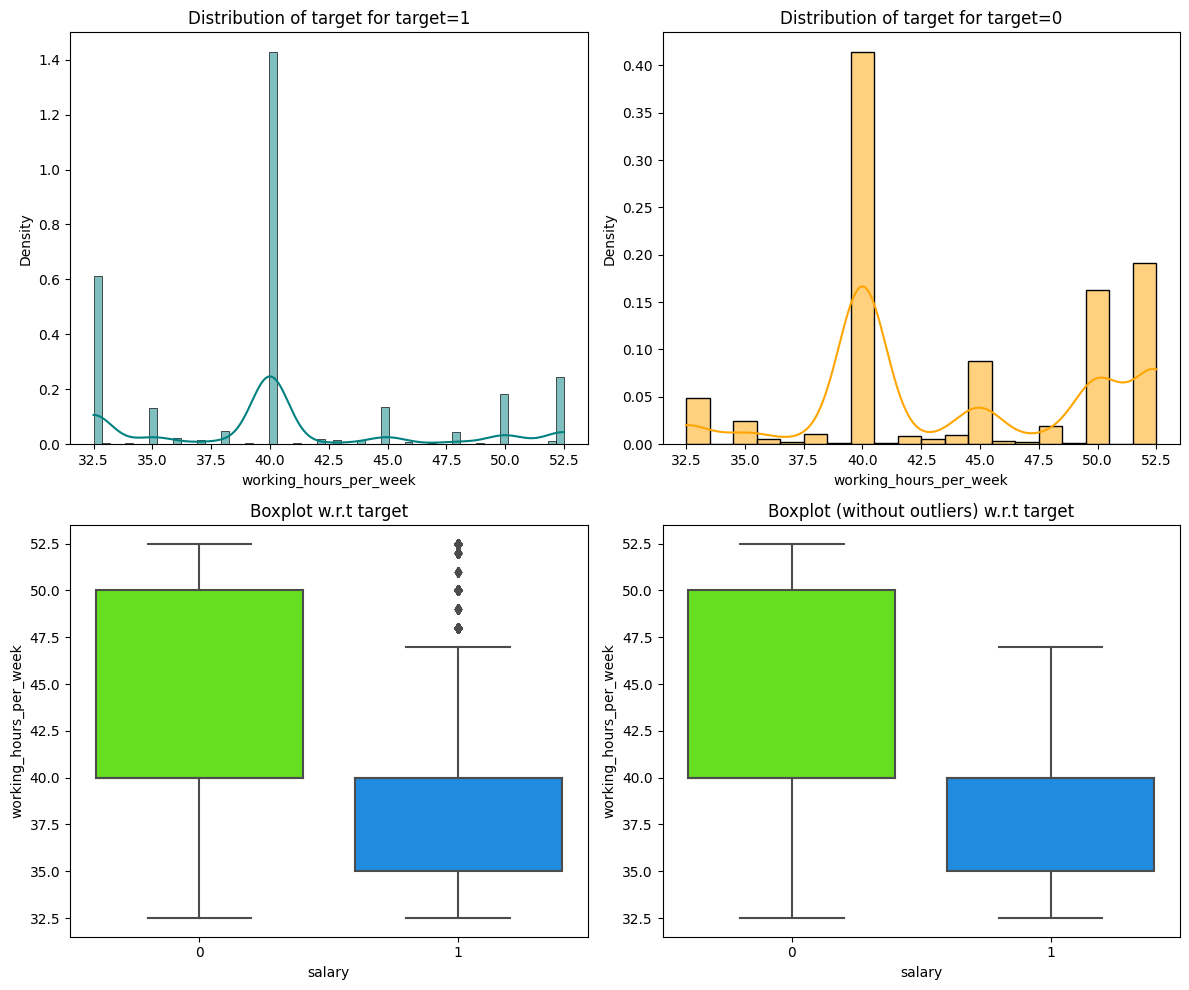

<IPython.core.display.Javascript object>

In [93]:
distribution_plot_wrt_target(df, "working_hours_per_week", "salary")

* Majority of people having above 50K salary work around 40 hours per week.
* Those having >50K salary have a higher range of working hours as compared to the ones with <=50K, but there are outliers present.

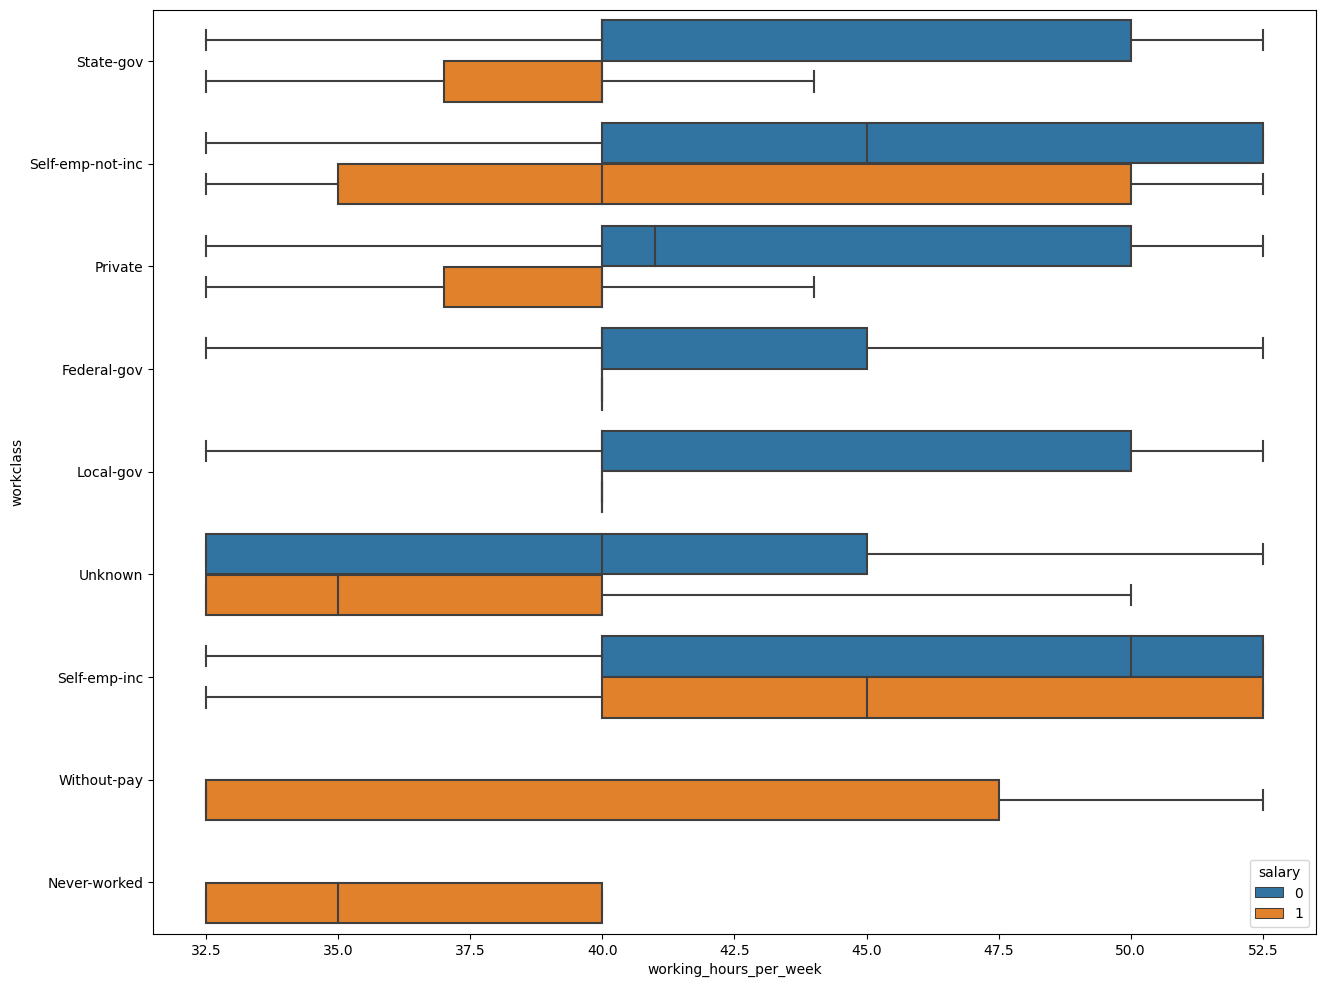

<IPython.core.display.Javascript object>

In [94]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="workclass", x="working_hours_per_week", data=df, hue="salary", showfliers=False
)
plt.show()

* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.
* Without pay and never worked will have no income or less than 50K income.
* The number of working hours for many government employees is concentrated at 40 hrs a week, which makes sense as government employees generally have fixed working hours.

### To jump back to the EDA summary section, click <a href = #link2>here</a>.